In [2437]:
# fetch screener.in and store data in a panda file
import requests
import pandas as pd
from bs4 import BeautifulSoup


def get_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.text
    else:
        print("Error fetching data from url: ", url)
        return None
    
def get_data_from_screener(url):
    data = get_data(url)
    if data is not None:
        soup = BeautifulSoup(data, 'html.parser')
        table = soup.find_all('table')
        if len(table) > 0:
            df = pd.read_html(str(table))[3]
            return df
        else:
            print("No table found in the page")
            return None
    else:
        return None



In [2438]:
from pyperclip import copy

In [2439]:
company = 'RADICO'

In [2440]:
url = f'https://www.screener.in/company/{company}/'

In [2441]:
resp = requests.get(url)
with open('tcs.html', 'wb') as f:
    f.write(resp.content)

In [2442]:
# resp = None
# with open('tcs.html', 'rb') as f:
#     resp = f.read()

In [2443]:
data = get_data(url)
if data is not None:
    soup = BeautifulSoup(data, 'html.parser')
    table = soup.find_all('table')

In [2444]:
# get company id
company_id = int(soup.find('div', {'id': 'company-info'})['data-company-id'])

In [2445]:
company_id

2620

In [2446]:
table

[<table class="data-table responsive-text-nowrap">
 <thead>
 <tr>
 <th class="text"></th>
 <th class="highlight-cell">Jun 2021</th>
 <th class="">Sep 2021</th>
 <th class="">Dec 2021</th>
 <th class="">Mar 2022</th>
 <th class="highlight-cell">Jun 2022</th>
 <th class="">Sep 2022</th>
 <th class="">Dec 2022</th>
 <th class="">Mar 2023</th>
 <th class="highlight-cell">Jun 2023</th>
 <th class="">Sep 2023</th>
 <th class="">Dec 2023</th>
 <th class="">Mar 2024</th>
 <th class="highlight-cell">Jun 2024</th>
 </tr>
 </thead>
 <tbody>
 <tr class="stripe">
 <td class="text">
 <button class="button-plain" onclick="Company.showSchedule('Sales', 'quarters', this)">
                 Sales <span class="blue-icon">+</span>
 </button>
 </td>
 <td class="highlight-cell">598</td>
 <td class="">709</td>
 <td class="">757</td>
 <td class="">813</td>
 <td class="highlight-cell">757</td>
 <td class="">761</td>
 <td class="">792</td>
 <td class="">832</td>
 <td class="highlight-cell">954</td>
 <td class="

In [2447]:
df = pd.read_html(str(table))[1]

In [2448]:
data = df.to_dict()

In [2449]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Mar 2013': {0: '1210',
  1: '1020',
  2: '190',
  3: '16%',
  4: '26',
  5: '71',
  6: '35',
  7: '109',
  8: '29%',
  9: '77',
  10: '5.81',
  11: '14%'},
 'Mar 2014': {0: '1378',
  1: '1182',
  2: '196',
  3: '14%',
  4: '34',
  5: '85',
  6: '39',
  7: '106',
  8: '33%',
  9: '71',
  10: '5.36',
  11: '15%'},
 'Mar 2015': {0: '1400',
  1: '1220',
  2: '180',
  3: '13%',
  4: '36',
  5: '90',
  6: '38',
  7: '87',
  8: '22%',
  9: '68',
  10: '5.08',
  11: '16%'},
 'Mar 2016': {0: '1643',
  1: '1452',
  2: '191',
  3: '12%',
  4: '36',
  5: '85',
  6: '43',
  7: '99',
  8: '26%',
  9: '73',
  10: '5.52',
  11: '14%'},
 'Mar 2017': {0: '1657',
  1: '1444',
  2: '214',
  3: '13%',
  4: '18',
  5: '81',
  6: '42',
  7: '

In [2450]:
compunded_sales_growth = (int(data[list(data)[-2]][0]) / int(data[list(data)[1]][0])) ** (1/11) - 1
compunded_sales_growth *= 100

In [2451]:
compunded_sales_growth

11.747911680483503

In [2452]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Mar 2013': {0: '1210',
  1: '1020',
  2: '190',
  3: '16%',
  4: '26',
  5: '71',
  6: '35',
  7: '109',
  8: '29%',
  9: '77',
  10: '5.81',
  11: '14%'},
 'Mar 2014': {0: '1378',
  1: '1182',
  2: '196',
  3: '14%',
  4: '34',
  5: '85',
  6: '39',
  7: '106',
  8: '33%',
  9: '71',
  10: '5.36',
  11: '15%'},
 'Mar 2015': {0: '1400',
  1: '1220',
  2: '180',
  3: '13%',
  4: '36',
  5: '90',
  6: '38',
  7: '87',
  8: '22%',
  9: '68',
  10: '5.08',
  11: '16%'},
 'Mar 2016': {0: '1643',
  1: '1452',
  2: '191',
  3: '12%',
  4: '36',
  5: '85',
  6: '43',
  7: '99',
  8: '26%',
  9: '73',
  10: '5.52',
  11: '14%'},
 'Mar 2017': {0: '1657',
  1: '1444',
  2: '214',
  3: '13%',
  4: '18',
  5: '81',
  6: '42',
  7: '

In [2453]:
data

{'Unnamed: 0': {0: 'Sales\xa0+',
  1: 'Expenses\xa0+',
  2: 'Operating Profit',
  3: 'OPM %',
  4: 'Other Income\xa0+',
  5: 'Interest',
  6: 'Depreciation',
  7: 'Profit before tax',
  8: 'Tax %',
  9: 'Net Profit\xa0+',
  10: 'EPS in Rs',
  11: 'Dividend Payout %'},
 'Mar 2013': {0: '1210',
  1: '1020',
  2: '190',
  3: '16%',
  4: '26',
  5: '71',
  6: '35',
  7: '109',
  8: '29%',
  9: '77',
  10: '5.81',
  11: '14%'},
 'Mar 2014': {0: '1378',
  1: '1182',
  2: '196',
  3: '14%',
  4: '34',
  5: '85',
  6: '39',
  7: '106',
  8: '33%',
  9: '71',
  10: '5.36',
  11: '15%'},
 'Mar 2015': {0: '1400',
  1: '1220',
  2: '180',
  3: '13%',
  4: '36',
  5: '90',
  6: '38',
  7: '87',
  8: '22%',
  9: '68',
  10: '5.08',
  11: '16%'},
 'Mar 2016': {0: '1643',
  1: '1452',
  2: '191',
  3: '12%',
  4: '36',
  5: '85',
  6: '43',
  7: '99',
  8: '26%',
  9: '73',
  10: '5.52',
  11: '14%'},
 'Mar 2017': {0: '1657',
  1: '1444',
  2: '214',
  3: '13%',
  4: '18',
  5: '81',
  6: '42',
  7: '

In [2454]:
sales_list = []
for i in range(1, 13):
    sales_list.append(int(data[list(data)[i]][0]))

In [2455]:
expenses_list = []
for i in range(1, 13):
    expenses_list.append(int(data[list(data)[i]][1]))

In [2456]:
opm_percent_list = []
for i in range(1, 13):
    opm_percent_list.append(int(data[list(data)[i]][3][:-1]))


In [2457]:
interest_list = []
for i in range(1, 13):
    interest_list.append(int(data[list(data)[i]][5]))

In [2458]:
depreciation_list = []
for i in range(1, 13):
    depreciation_list.append(int(data[list(data)[i]][6]))

In [2459]:
net_profit_list = []
for i in range(1, 13):
    net_profit_list.append(int(data[list(data)[i]][9]))

In [2460]:
eps = []
for i in range(1, 13):
    eps.append(float(data[list(data)[i]][10]))

In [2461]:
other_assests_url = f'https://www.screener.in/api/company/{company_id}/schedules/?parent=Other+Assets&section=balance-sheet'

other_assests_url_resp = requests.get(other_assests_url)

In [2462]:
cash_equivalents = []
cash_equivalents_data = other_assests_url_resp.json()['Cash Equivalents']
for i in cash_equivalents_data.values():
    cash_equivalents.append(int(i.replace(',', '')))

trade_receivables = []
trade_receivables_data = other_assests_url_resp.json()['Trade receivables']
for i in trade_receivables_data.values():
    try:
        trade_receivables.append(int(i.replace(',', '')))
    except:
        pass



In [2463]:
trade_receivables_data

{'Mar 2013': '435',
 'Mar 2014': '523',
 'Mar 2015': '478',
 'Mar 2016': '611',
 'Mar 2017': '624',
 'Mar 2018': '630',
 'Mar 2019': '642',
 'Mar 2020': '823',
 'Mar 2021': '697',
 'Mar 2022': '756',
 'Mar 2023': '824',
 'Mar 2024': '978',
 'isExpandable': 'Company.showSchedule("Trade receivables", "balance-sheet", this)'}

In [2464]:
cash_from_investing_url = f'https://www.screener.in/api/company/{company_id}/schedules/?parent=Cash+from+Investing+Activity&section=cash-flow'
cash_from_investing = requests.get(cash_from_investing_url)

In [2465]:
copy(cash_from_investing_url)

In [2466]:
cash_from_investing_list = []
for i in cash_from_investing.json()['Fixed assets purchased'].values():
    cash_from_investing_list.append(-(int(i.replace(',', ''))))

In [2467]:
cash_from_investing_list

[63, 74, 49, 42, 19, 26, 76, 78, 129, 137, 713, 252]

In [2468]:
balance_sheet = pd.read_html(str(table))[6].to_dict()

In [2469]:
total_assets = []
for i in range(1, 13):
    total_assets.append(int(balance_sheet[list(balance_sheet)[i]][9]))
    

In [2470]:
equity = []
for i in range(1, 13):
    equity.append(int(balance_sheet[list(balance_sheet)[i]][1]))

In [2471]:
borrowings = []
for i in range(1, 13):
    borrowings.append(int(balance_sheet[list(balance_sheet)[i]][2]))


In [2472]:
cash_flow = pd.read_html(str(table))[7].to_dict()

In [2473]:
cash_from_operation_list = []
for i in range(1, 13):
    cash_from_operation_list.append(int(cash_flow[list(cash_flow)[i]][0]))

In [2474]:
shareholding_pattern = pd.read_html(str(table))[10].to_dict()

In [2475]:
promoter_holding = []
promoter_holding_years = []
for i in shareholding_pattern:
    try:
        promoter_holding.append(float(shareholding_pattern[i][0][:-1]))
        promoter_holding_years.append(i)
    except:
        pass

In [2476]:
ratios = pd.read_html(str(table))[8].to_dict()



In [2477]:
cash_conversion_cycle = []
for i in range(1, 13):
    cash_conversion_cycle.append(int(ratios[list(ratios)[i]][3]))

In [2478]:
roce_percent = []
for i in range(1, 13):
    try:
        roce_percent.append(float(ratios[list(ratios)[i]][5][:-1]))
    except:
        roce_percent.append(0)

In [2479]:
cash_conversion_cycle

[174, 185, 194, 209, 211, 201, 201, 187, 239, 228, 277, 226]

In [2480]:
roce_percent

[13.0, 12.0, 11.0, 10.0, 10.0, 14.0, 19.0, 18.0, 19.0, 16.0, 12.0, 13.0]

In [2481]:
year_list = []
for i in range(1, 13):
    year_list.append(list(data)[i])

In [2482]:
year_list

['Mar 2013',
 'Mar 2014',
 'Mar 2015',
 'Mar 2016',
 'Mar 2017',
 'Mar 2018',
 'Mar 2019',
 'Mar 2020',
 'Mar 2021',
 'Mar 2022',
 'Mar 2023',
 'Mar 2024']

In [2483]:
sales_list

[1210, 1378, 1400, 1643, 1657, 1797, 2063, 2395, 2374, 2859, 3133, 4106]

In [2484]:
sales_list


[1210, 1378, 1400, 1643, 1657, 1797, 2063, 2395, 2374, 2859, 3133, 4106]

In [2485]:
# calculate percent change in sales
percent_change_sales = []
for i in range(1, 12):
    percent_change_sales.append(((sales_list[i] - sales_list[i-1]) / sales_list[i-1]) * 100)
    

In [2486]:
# calculate standard deviation of percent change in sales
import statistics
std_dev_sales = statistics.stdev(percent_change_sales)


In [2487]:
std_dev_sales

9.52731391744351

In [2488]:
import matplotlib.pyplot as plt

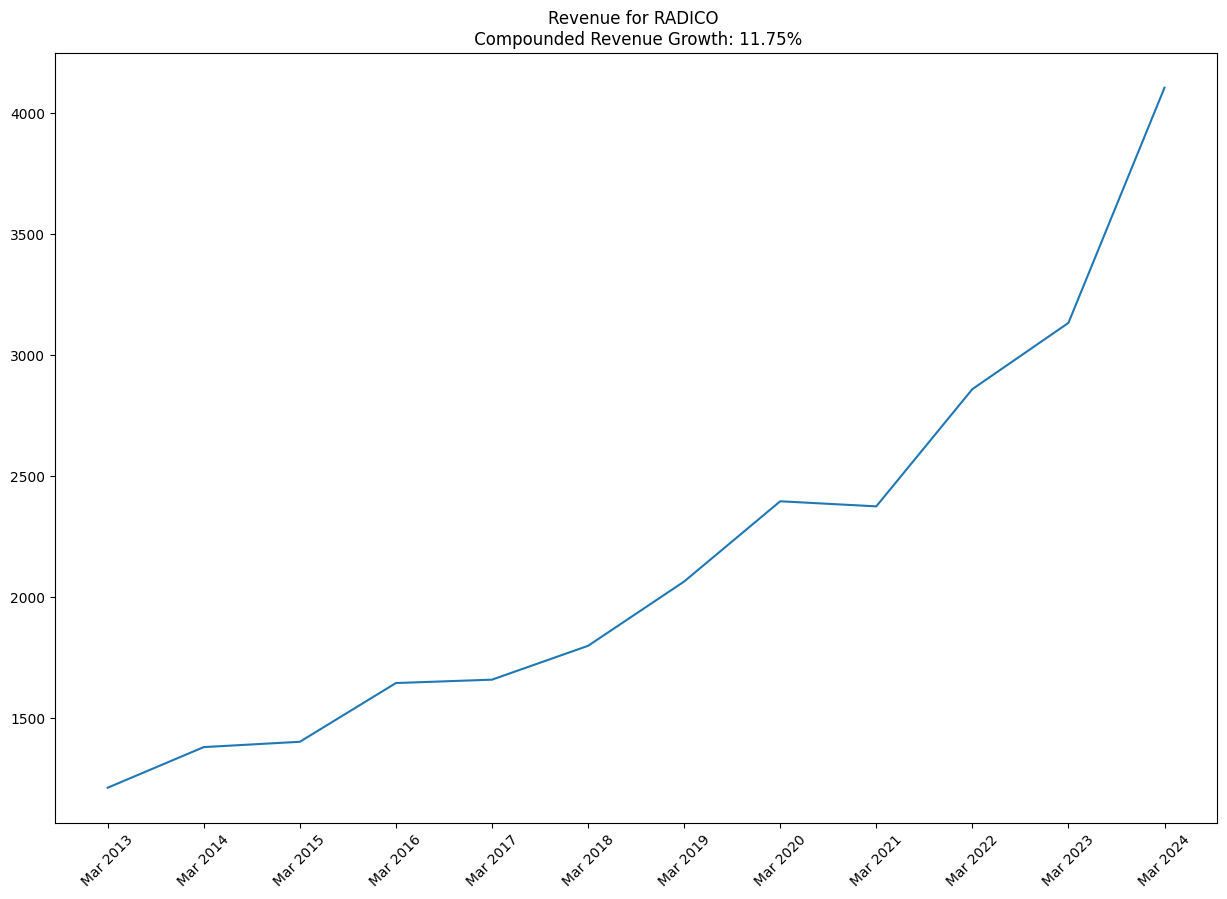

Revenue is the total amount of money a company earns from its business activities before any expenses or costs are deducted. It is a crucial indicator of a company's financial performance and overall health


In [2489]:
# plot the sales data


# show compunded_sales_growth in title
plt.figure(figsize=(15, 10))
plt.title(f"Revenue for {company} \n Compounded Revenue Growth: {compunded_sales_growth:.2f}%")

# for x-axis
plt.xticks(range(len(year_list)), year_list, rotation=45)

plt.plot(sales_list)
plt.show()
print("Revenue is the total amount of money a company earns from its business activities before any expenses or costs are deducted. It is a crucial indicator of a company's financial performance and overall health")

In [2490]:
sales_list_mean = sales_list[:]
sales_list_max = sales_list[:]
sales_list_min = sales_list[:]
for i in range(5):
    sales_list_mean.append(sales_list_mean[-1] * (1 + compunded_sales_growth / 100))
    sales_list_max.append(sales_list_max[-1] * (1 + (compunded_sales_growth + 2*std_dev_sales) / 100))
    sales_list_min.append(sales_list_min[-1] * (1 + (compunded_sales_growth - 2*std_dev_sales) / 100))


In [2491]:
# extend the year_list
year_list_new = year_list[:]
last_year = int(year_list[-1].split()[1])
for i in range(1, 6):
    year_list_new.append(f'Predicted Mar {last_year+i}')  

In [2492]:
year_list_new

['Mar 2013',
 'Mar 2014',
 'Mar 2015',
 'Mar 2016',
 'Mar 2017',
 'Mar 2018',
 'Mar 2019',
 'Mar 2020',
 'Mar 2021',
 'Mar 2022',
 'Mar 2023',
 'Mar 2024',
 'Predicted Mar 2025',
 'Predicted Mar 2026',
 'Predicted Mar 2027',
 'Predicted Mar 2028',
 'Predicted Mar 2029']

In [2493]:
def confidence_index_graph(title, year_list, data_list, extended_years=3):
    plt.figure(figsize=(15, 10))
    plt.title(('Predicted ' if extended_years else '')+ title)
    year_list_new = year_list[:]
    try:
        last_year = int(year_list[-1].split()[1])
        for i in range(1, extended_years+1):
            year_list_new.append(f'Predicted Mar {last_year+i}')  
    except:
        ...
    for data in data_list:
        percent_change_data = []
        for i in range(len(data) - 1):
            try:
                percent_change_data.append(((data[i] - data[i-1]) / data[i-1]) * 100)
            except:
                percent_change_data.append(0)
        std_dev_data = statistics.stdev(percent_change_data)
        data_mean = data[:]
        data_max = data[:]
        data_min = data[:]
        for i in range(extended_years):
            data_mean.append(data_mean[-1] * (1 + compunded_sales_growth / 100))
            data_max.append(data_max[-1] * (1 + (compunded_sales_growth + 2*std_dev_data) / 100))
            data_min.append(data_min[-1] * (1 + (compunded_sales_growth - 2*std_dev_data) / 100))
        plt.xticks(range(len(year_list_new)), year_list_new, rotation=90)
        plt.plot(data)
        plt.plot(range(len(year_list)-1, len(year_list)+extended_years), data_mean[len(year_list)-1:], linestyle='dashed')
        plt.plot(range(len(year_list)-1, len(year_list)+extended_years), data_max[len(year_list)-1:], linestyle='dashed')
        plt.plot(range(len(year_list)-1, len(year_list)+extended_years), data_min[len(year_list)-1:], linestyle='dashed')
    plt.show()

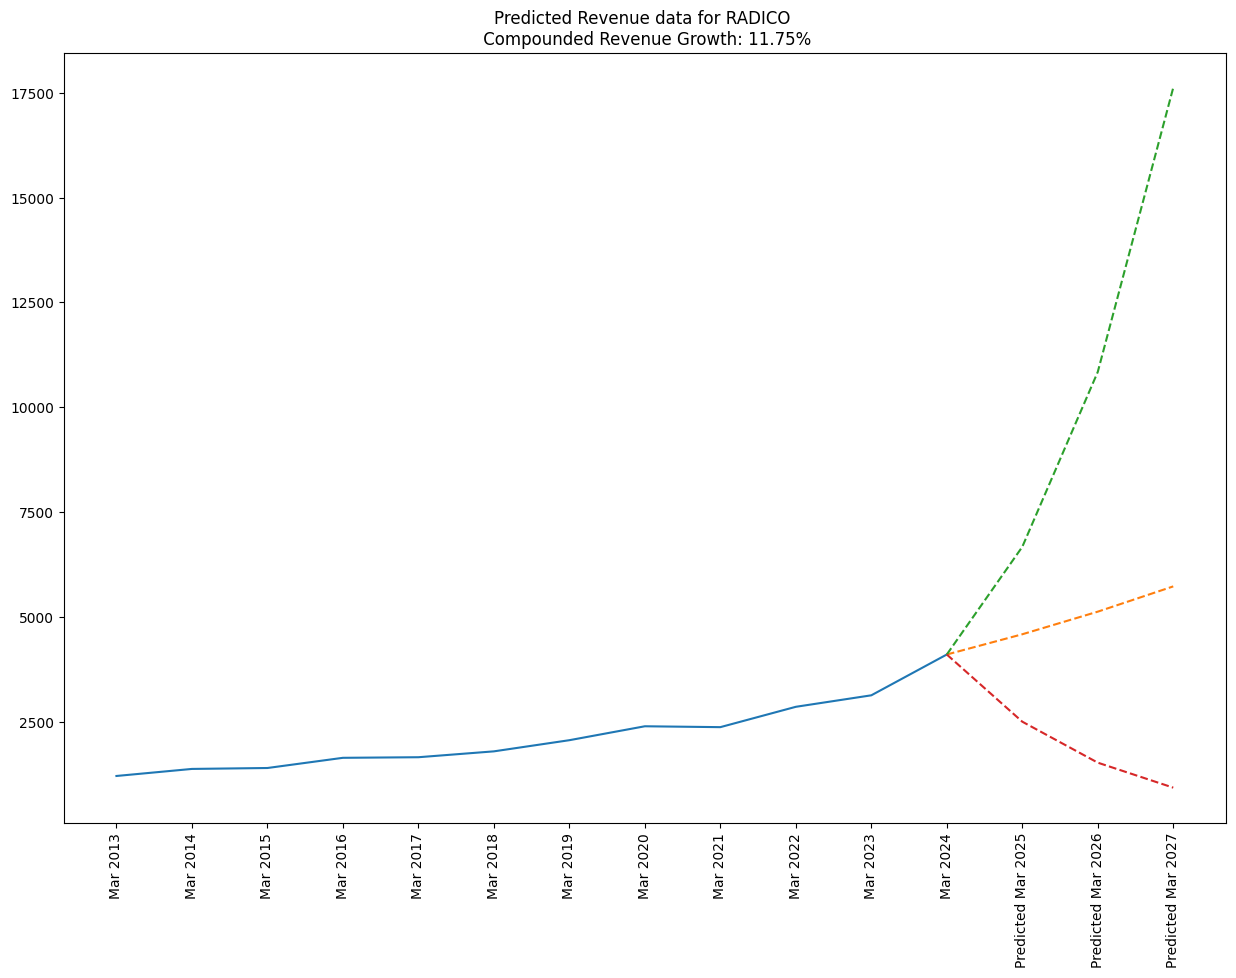

In [2494]:
confidence_index_graph(f"Revenue data for {company} \n Compounded Revenue Growth: {compunded_sales_growth:.2f}%", year_list, [sales_list])

In [2495]:
# # plot 
# plt.title(f"Sales data for {company} \n Compounded Revenue Growth: {compunded_sales_growth:.2f}%")

# # for x-axis
# plt.xticks(range(17), year_list_new, rotation=90)

# # change color to red for predicted data
# plt.plot(sales_list[:12], color='blue')

# # plot for only last 5 years

# plt.plot(range(11,17),sales_list_mean[11:], color='green')
# plt.plot(range(11,17),sales_list_max[11:], color='red')
# plt.plot(range(11,17),sales_list_min[11:], color='pink')

# plt.figure(figsize=(15, 10)); plt.show()


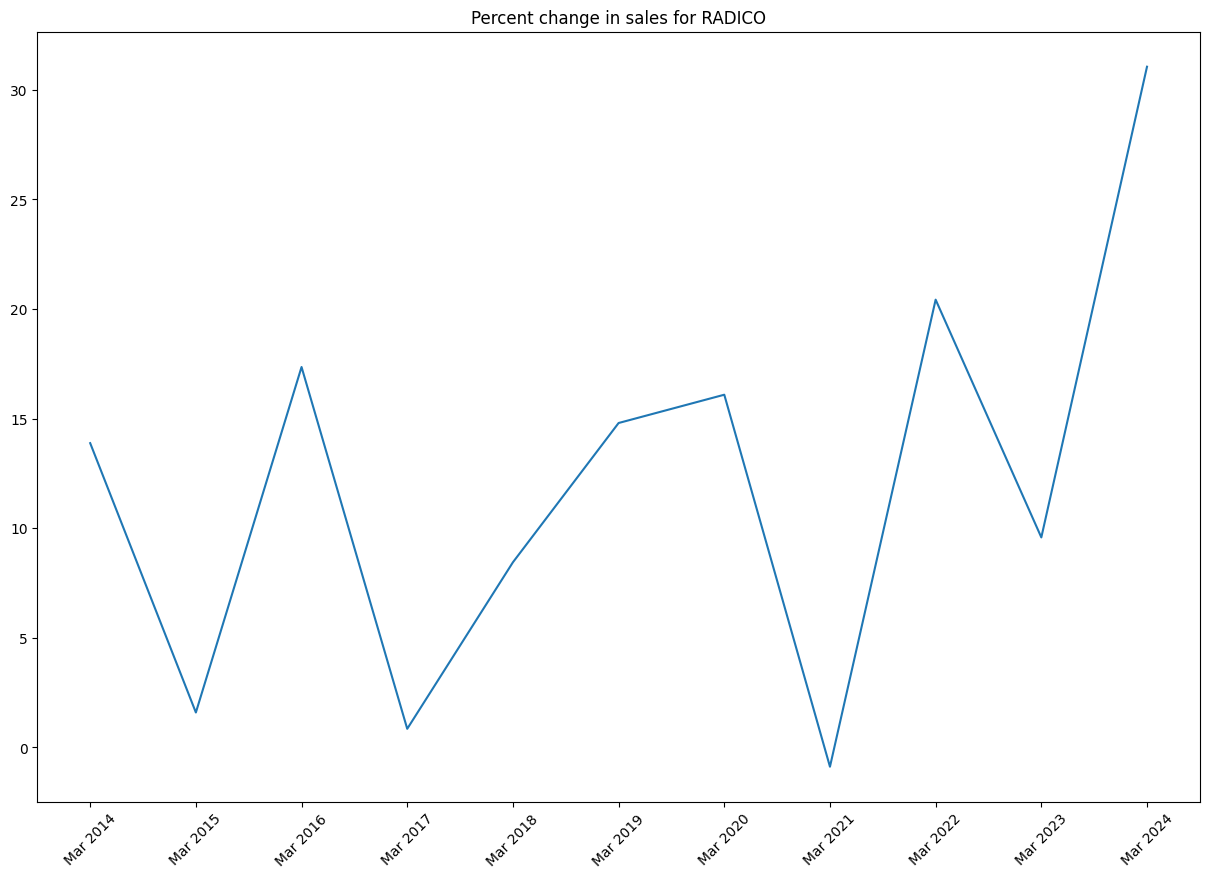

In [2496]:
# plot percent_change_sales
plt.figure(figsize=(15, 10))
plt.title(f"Percent change in sales for {company}")
plt.xticks(range(11), year_list[1:], rotation=45)
plt.plot(percent_change_sales)
plt.show()


In [2497]:
operating_profit_list = []
for i in range(12):
    operating_profit_list.append(sales_list[i] - expenses_list[i])



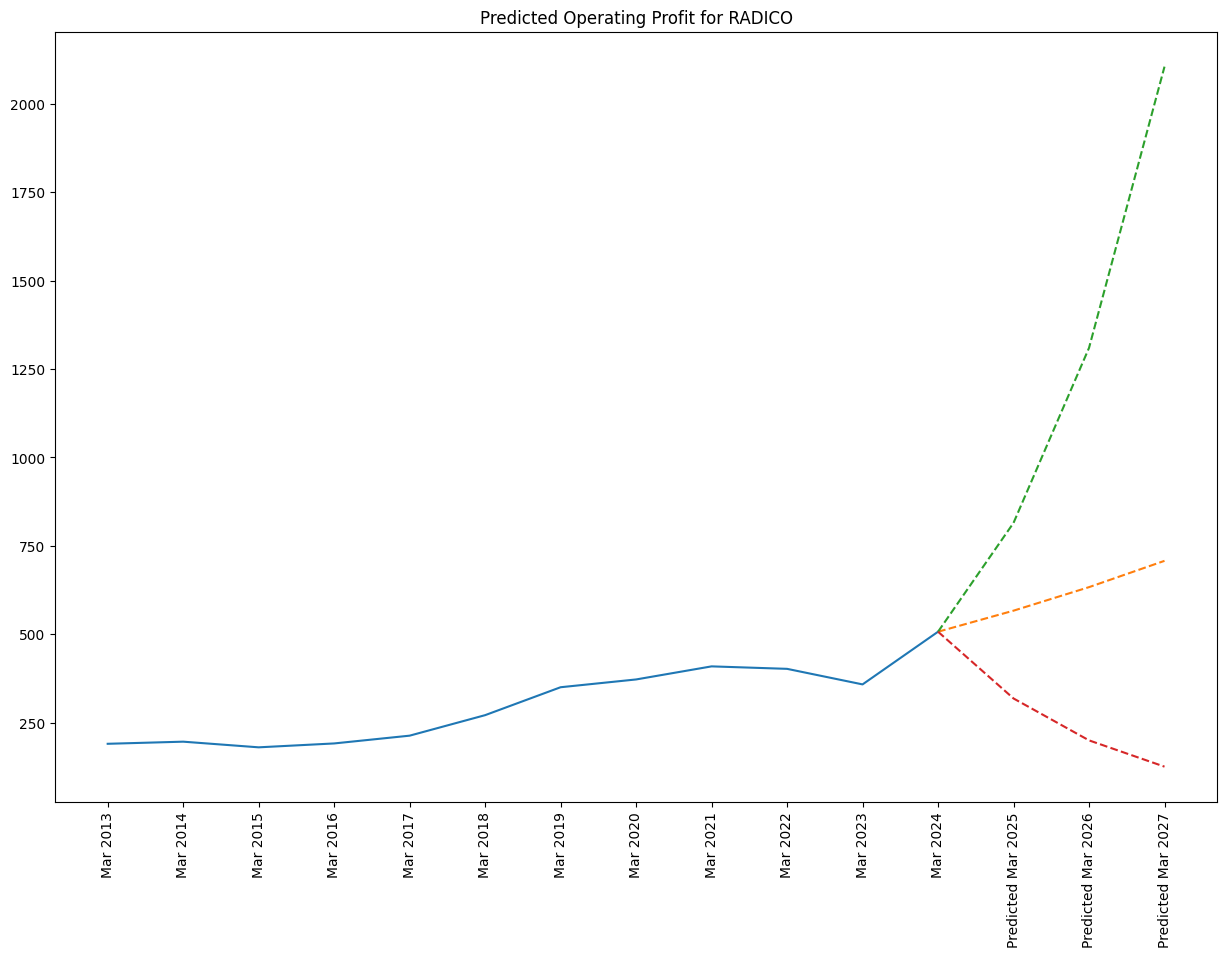

In [2498]:
confidence_index_graph(f"Operating Profit for {company}", year_list, [operating_profit_list], 3)

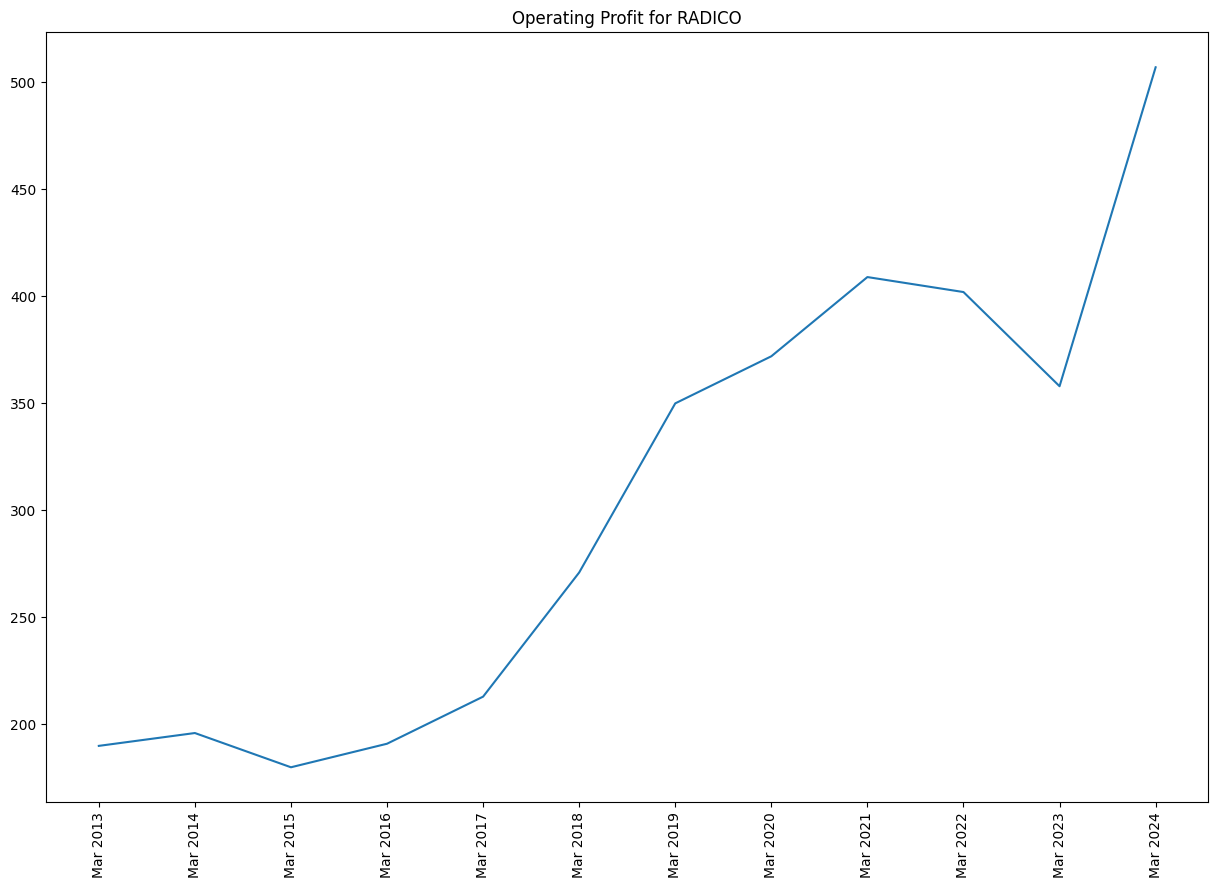

Operating profit, also known as operating income or operating earnings, is a key financial metric that represents the profit a company makes from its core business operations. It is calculated by subtracting operating expenses (such as wages, rent, and raw materials) from gross profit (which is revenue minus the cost of goods sold).


In [2499]:
# plot operating profit
# plt.title(f"Operating Profit for {company}")
# plt.xticks(range(12), year_list, rotation=45)
# plt.plot(operating_profit_list)
# plt.figure(figsize=(15, 10)); plt.show()
confidence_index_graph(f"Operating Profit for {company}", year_list, [operating_profit_list], 0)
print('Operating profit, also known as operating income or operating earnings, is a key financial metric that represents the profit a company makes from its core business operations. It is calculated by subtracting operating expenses (such as wages, rent, and raw materials) from gross profit (which is revenue minus the cost of goods sold).')

In [2500]:
sales_list

[1210, 1378, 1400, 1643, 1657, 1797, 2063, 2395, 2374, 2859, 3133, 4106]

In [2501]:
operating_profit_margin_list = []
for i in range(12):
    operating_profit_margin_list.append(operating_profit_list[i] / sales_list[i] * 100)

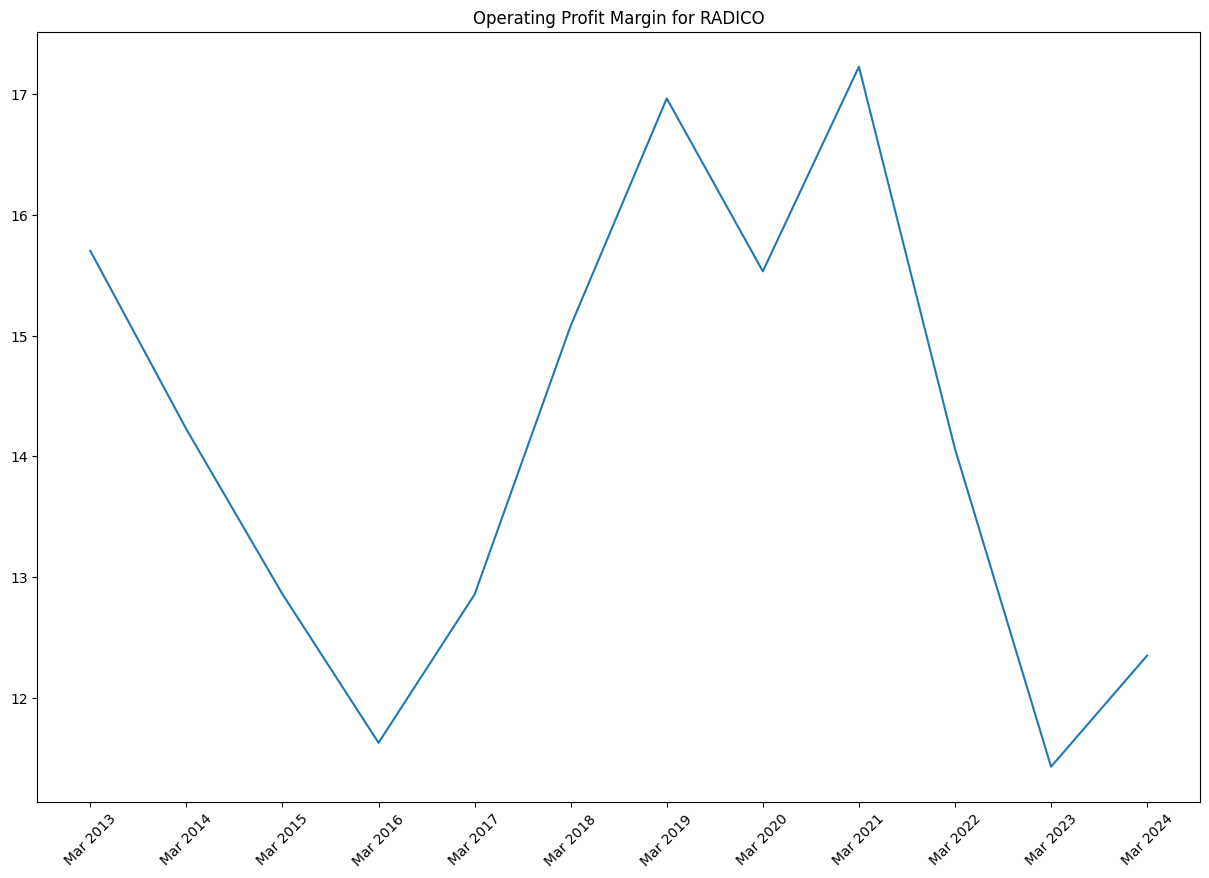

The operating profit margin is a financial ratio that shows the percentage of revenue that remains as operating profit after covering operating expense


In [2502]:
# plot operating profit margin
plt.figure(figsize=(15, 10))
plt.title(f"Operating Profit Margin for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(operating_profit_margin_list)
plt.show()
print("The operating profit margin is a financial ratio that shows the percentage of revenue that remains as operating profit after covering operating expense")


In [2503]:
cash_from_investing_list

[63, 74, 49, 42, 19, 26, 76, 78, 129, 137, 713, 252]

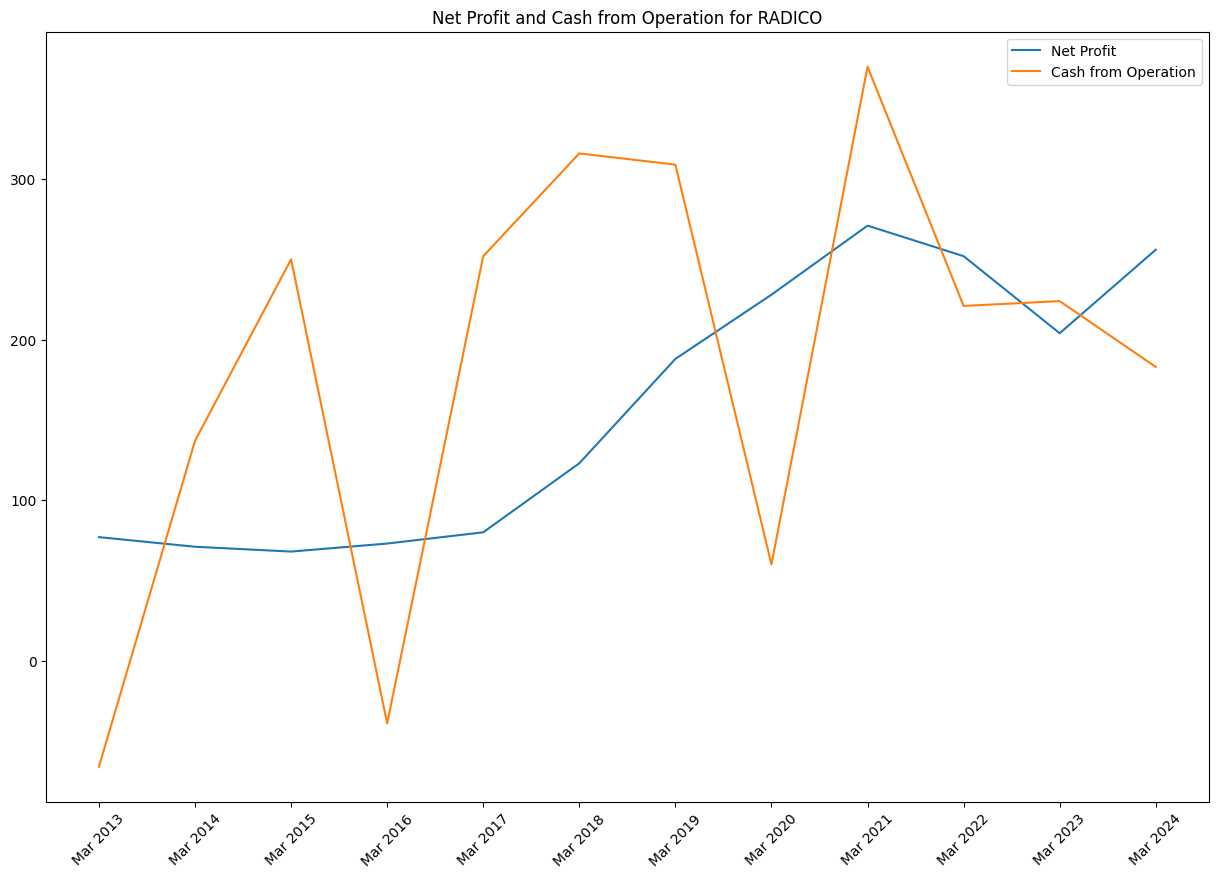

Net profit, also known as net income or net earnings, is the total amount of money a company retains after all expenses, including operating costs, interest, taxes, and any other expenses, have been deducted from total revenue.
Cash from operations, often referred to as operating cash flow, is a key financial metric that shows the amount of cash a company generates from its core business activities. It is calculated by adjusting net income for changes in working capital and non-cash items such as depreciation and amortization.


In [2504]:
# plot net_profit_list and cash_from_operation_list
plt.figure(figsize=(15, 10))
plt.title(f"Net Profit and Cash from Operation for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_list, label='Net Profit')
plt.plot(cash_from_operation_list, label='Cash from Operation')
plt.legend()
plt.show()
print('Net profit, also known as net income or net earnings, is the total amount of money a company retains after all expenses, including operating costs, interest, taxes, and any other expenses, have been deducted from total revenue.')
print('Cash from operations, often referred to as operating cash flow, is a key financial metric that shows the amount of cash a company generates from its core business activities. It is calculated by adjusting net income for changes in working capital and non-cash items such as depreciation and amortization.')

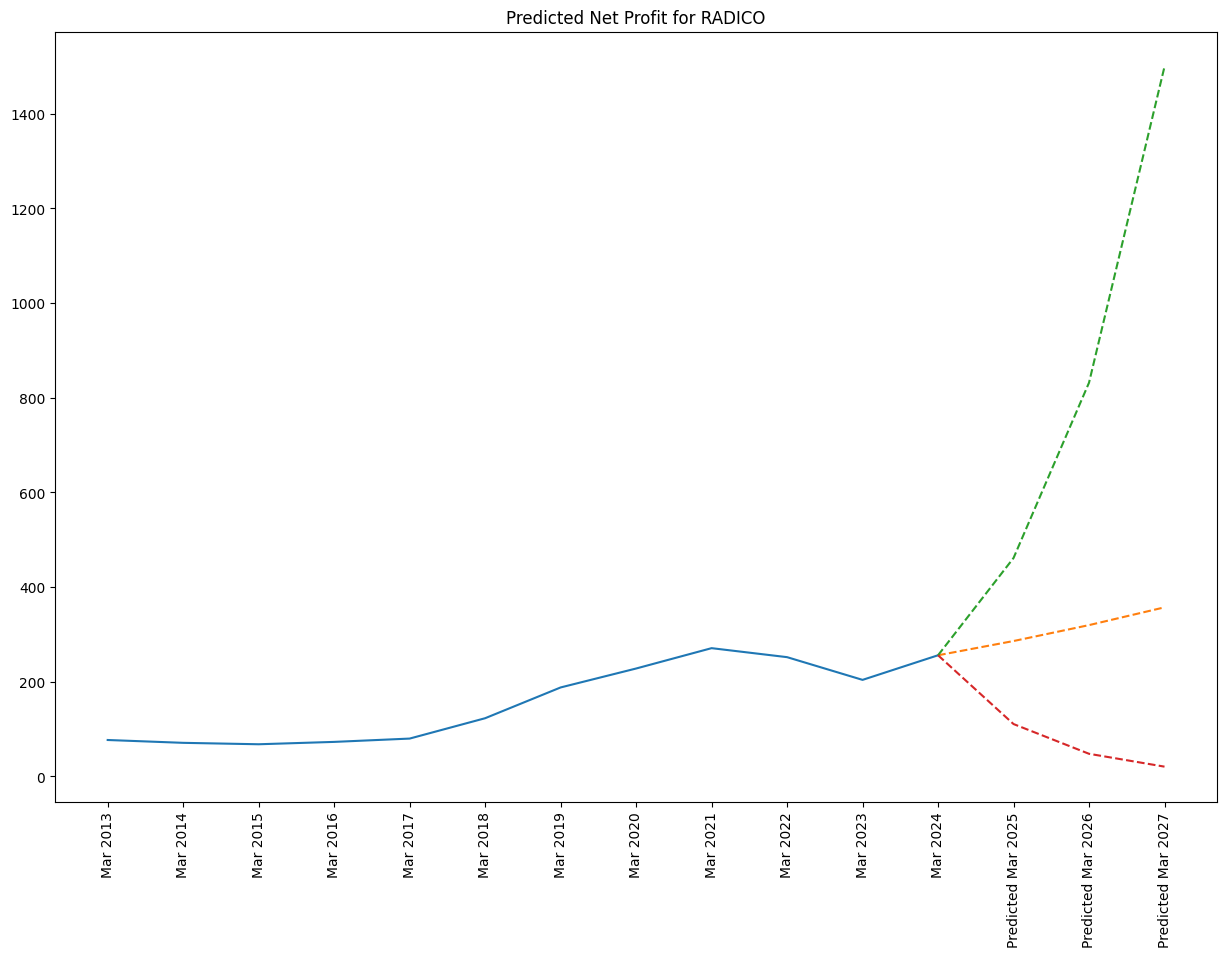

In [2505]:
confidence_index_graph(f"Net Profit for {company}", year_list, [net_profit_list], 3)

In [2506]:
cash_from_operation_list

[-66, 137, 250, -39, 252, 316, 309, 60, 370, 221, 224, 183]

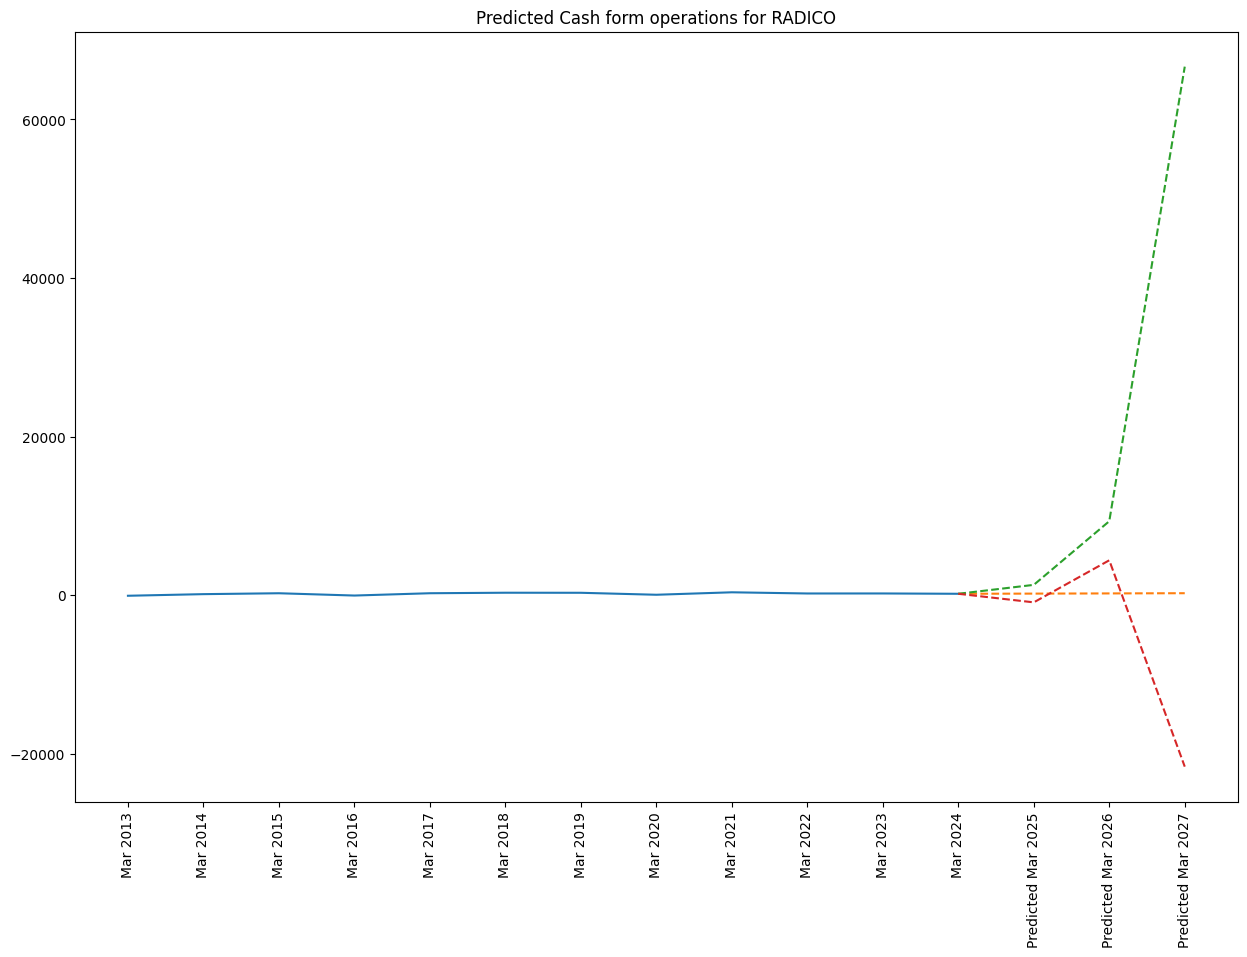

In [2507]:
confidence_index_graph(f"Cash form operations for {company}", year_list, [cash_from_operation_list], 3)

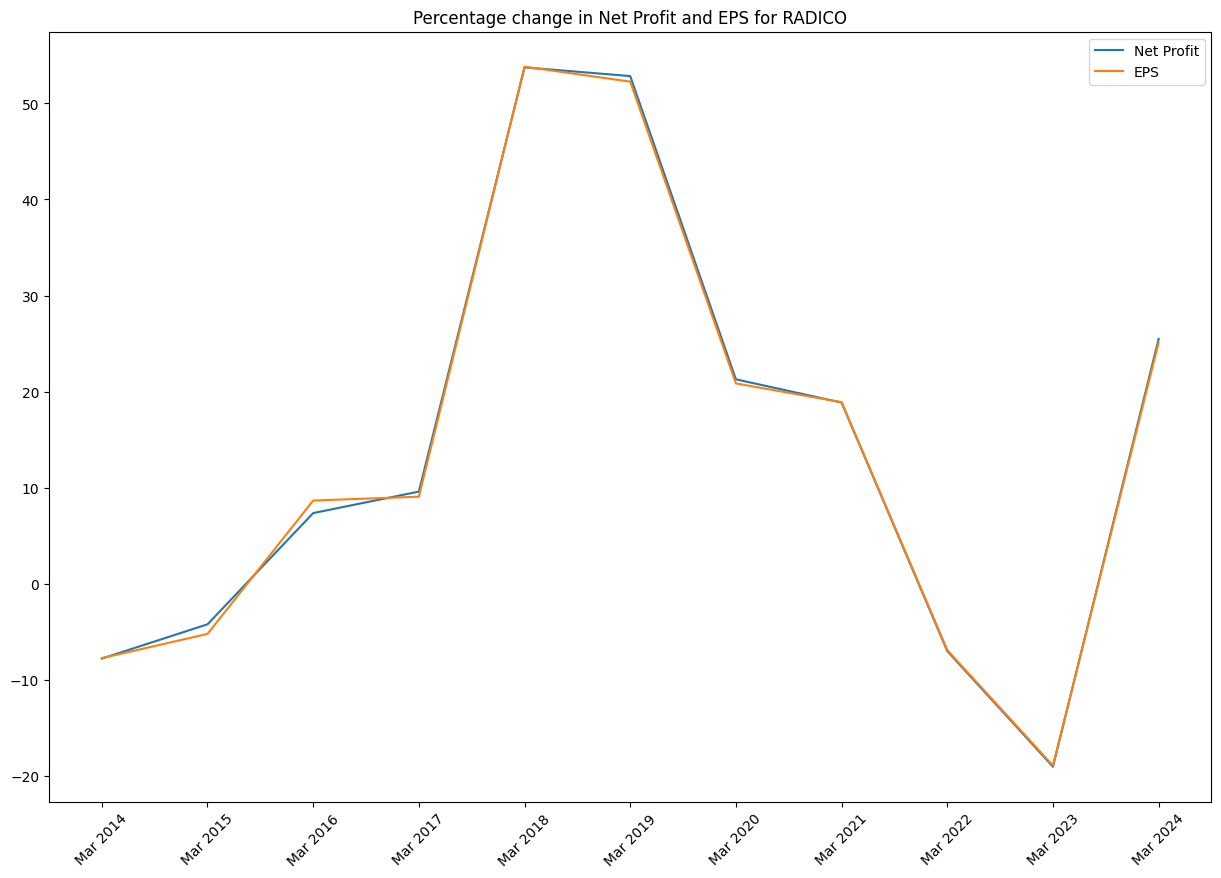

In [2508]:
# plotting percentage change in net profit and eps
percent_change_net_profit = []
for i in range(1, 12):
    percent_change_net_profit.append(((net_profit_list[i] - net_profit_list[i-1]) / net_profit_list[i-1]) * 100)

percent_change_eps = []
for i in range(1, 12):
    percent_change_eps.append(((eps[i] - eps[i-1]) / eps[i-1]) * 100)

plt.figure(figsize=(15, 10))
plt.title(f"Percentage change in Net Profit and EPS for {company}")
plt.xticks(range(11), year_list[1:], rotation=45)
plt.plot(percent_change_net_profit, label='Net Profit')
plt.plot(percent_change_eps, label='EPS')
plt.legend()
plt.show()


In [2509]:
unit_net_profit_list = [1]
for i in percent_change_net_profit:
    unit_net_profit_list.append(unit_net_profit_list[-1] * (1 + i/100))

In [2510]:
unit_eps_change = [1]
for i in percent_change_eps:
    unit_eps_change.append(unit_eps_change[-1] * (1 + i/100))
    

In [2511]:
copy('\t'.join([str(i) for i in unit_eps_change]))

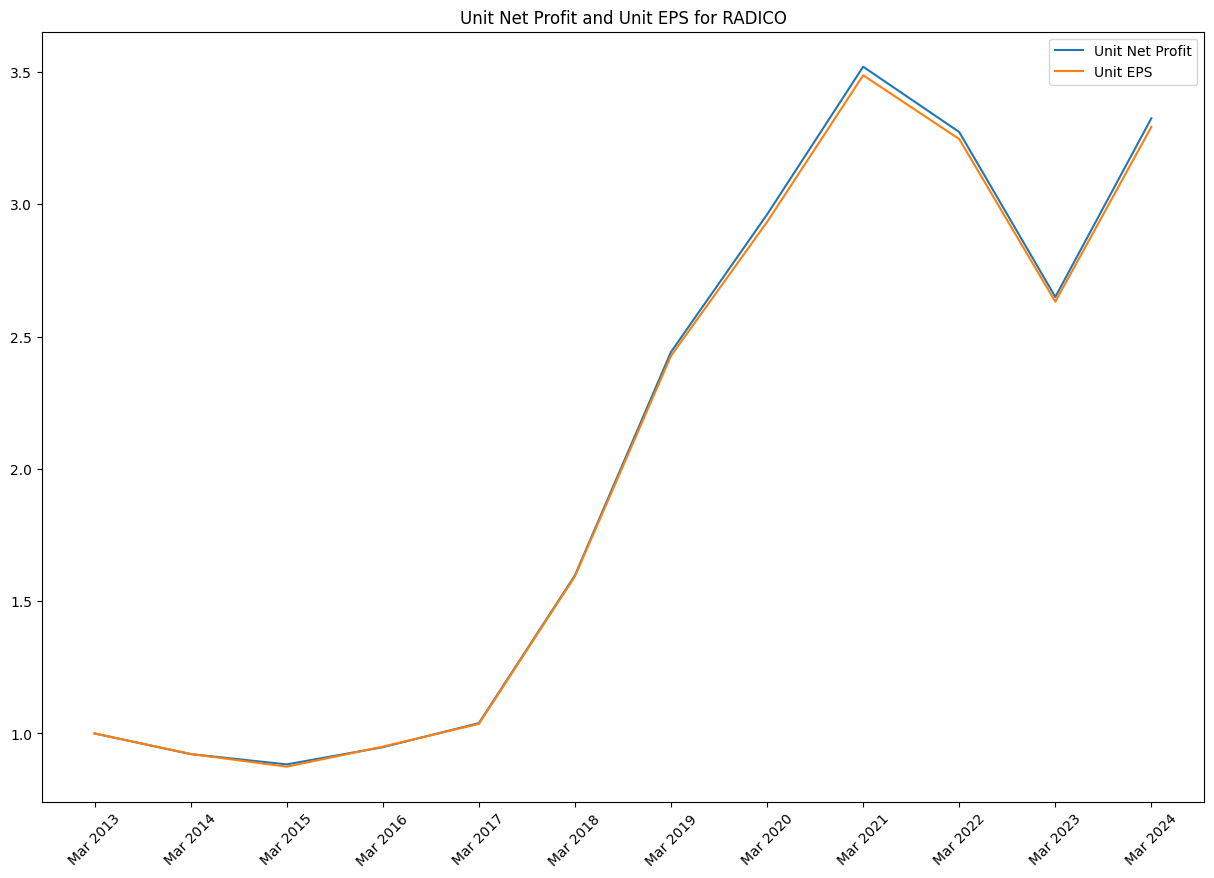

Earnings Per Share (EPS) is a financial metric that measures the portion of a company's profit attributable to each outstanding share of common stock.


In [2512]:
# plot unit net profit and unit eps
plt.figure(figsize=(15, 10))
plt.title(f"Unit Net Profit and Unit EPS for {company}")
plt.xticks(range(len(year_list)), year_list, rotation=45)
plt.plot(unit_net_profit_list, label='Unit Net Profit')
plt.plot(unit_eps_change, label='Unit EPS')
plt.legend()
plt.show()
print("Earnings Per Share (EPS) is a financial metric that measures the portion of a company's profit attributable to each outstanding share of common stock.")

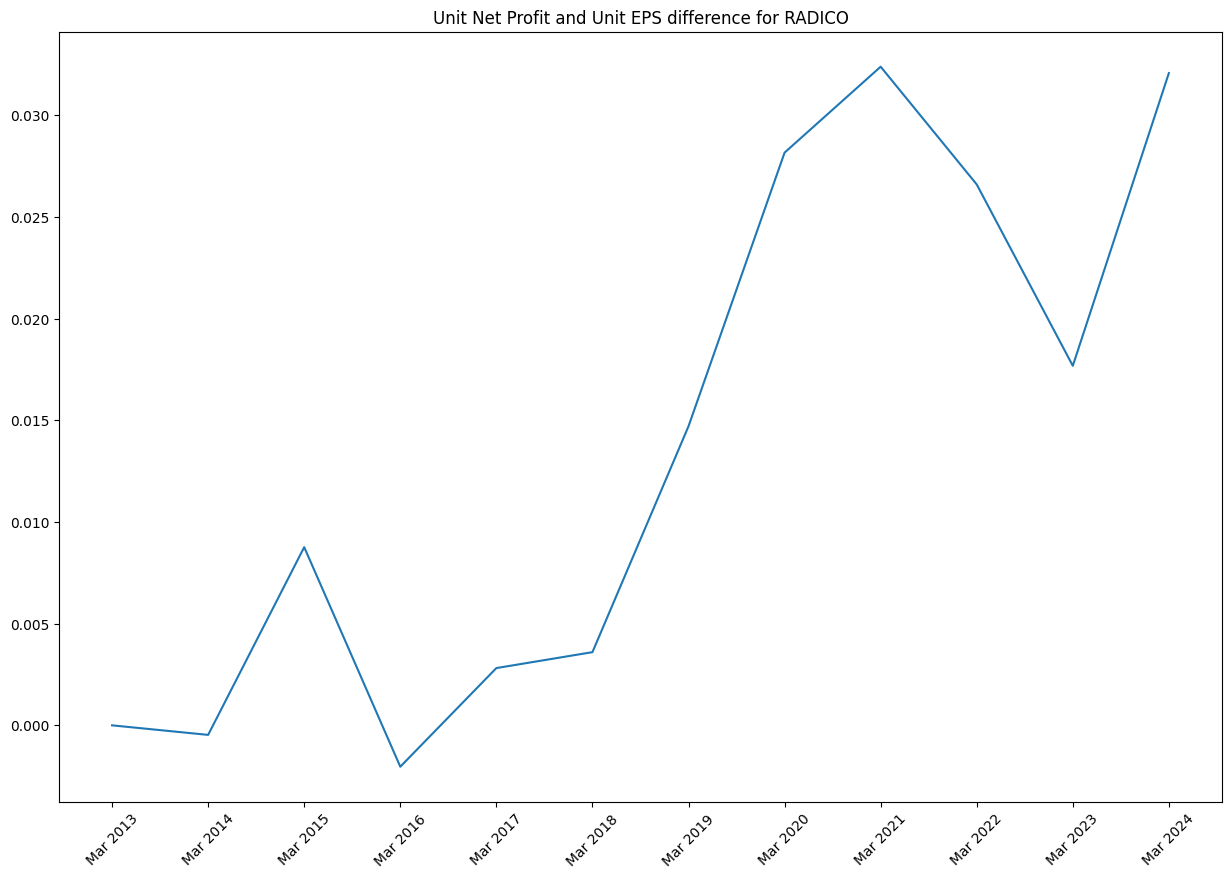

In [2513]:
# difference of unit net profit and unit eps
unit_net_profit_eps_diff = [unit_net_profit_list[i] - unit_eps_change[i] for i in range(len(unit_net_profit_list))]
plt.figure(figsize=(15, 10))
plt.title(f"Unit Net Profit and Unit EPS difference for {company}")
plt.xticks(range(len(year_list)), year_list, rotation=45)
plt.plot(unit_net_profit_eps_diff)
plt.show()

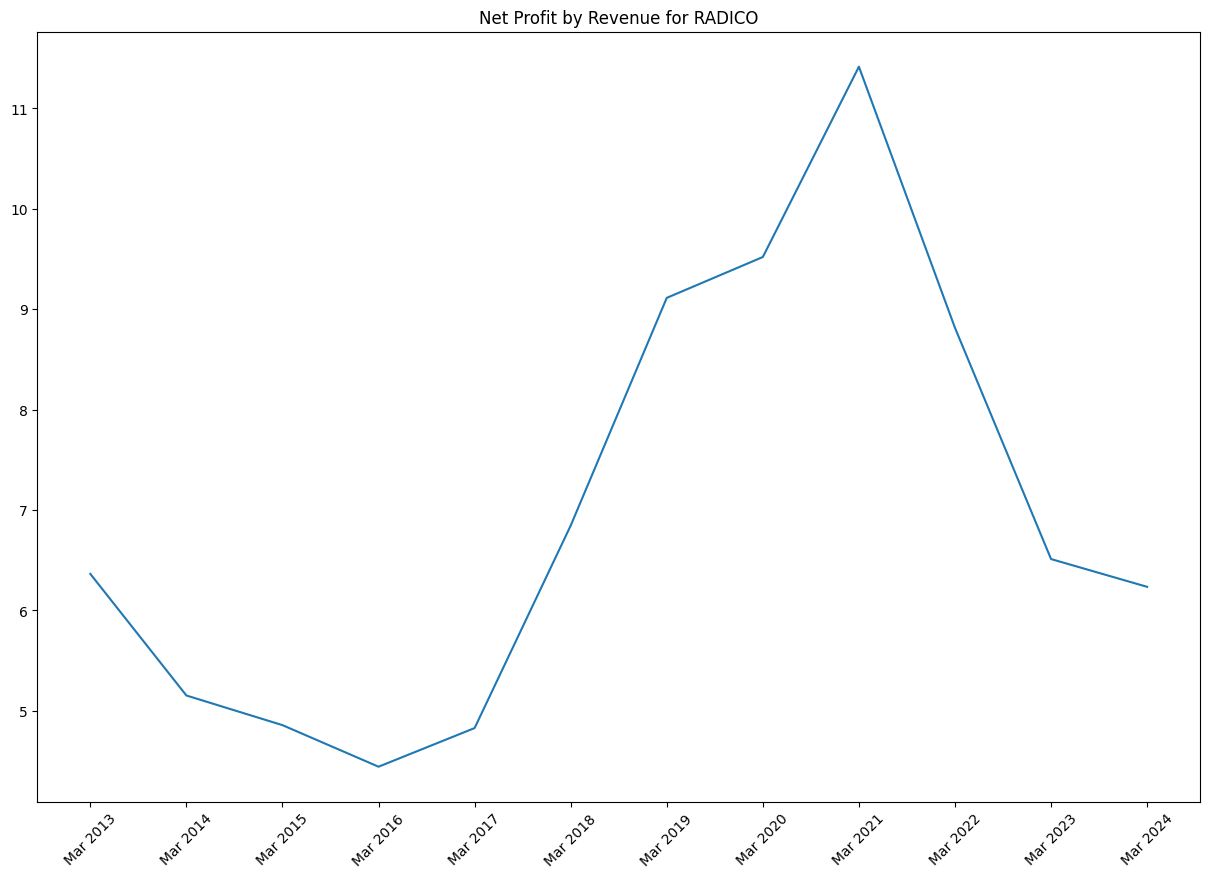

In [2514]:
# net_profit divided by sales graph
net_profit_by_sales = []
for i in range(12):
    net_profit_by_sales.append(net_profit_list[i] / sales_list[i] * 100)

plt.figure(figsize=(15, 10))
plt.title(f"Net Profit by Revenue for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_by_sales)
plt.show()


In [2515]:
capex_by_income = sum(cash_from_investing_list) / sum(net_profit_list) * 100

In [2516]:
capex_by_income

87.67847699629826

In [2517]:
cash_from_investing_list

[63, 74, 49, 42, 19, 26, 76, 78, 129, 137, 713, 252]

In [2518]:
capex_list = []
for i in range(12):
    capex_list.append(cash_from_investing_list[i] / net_profit_list[i] * 100)


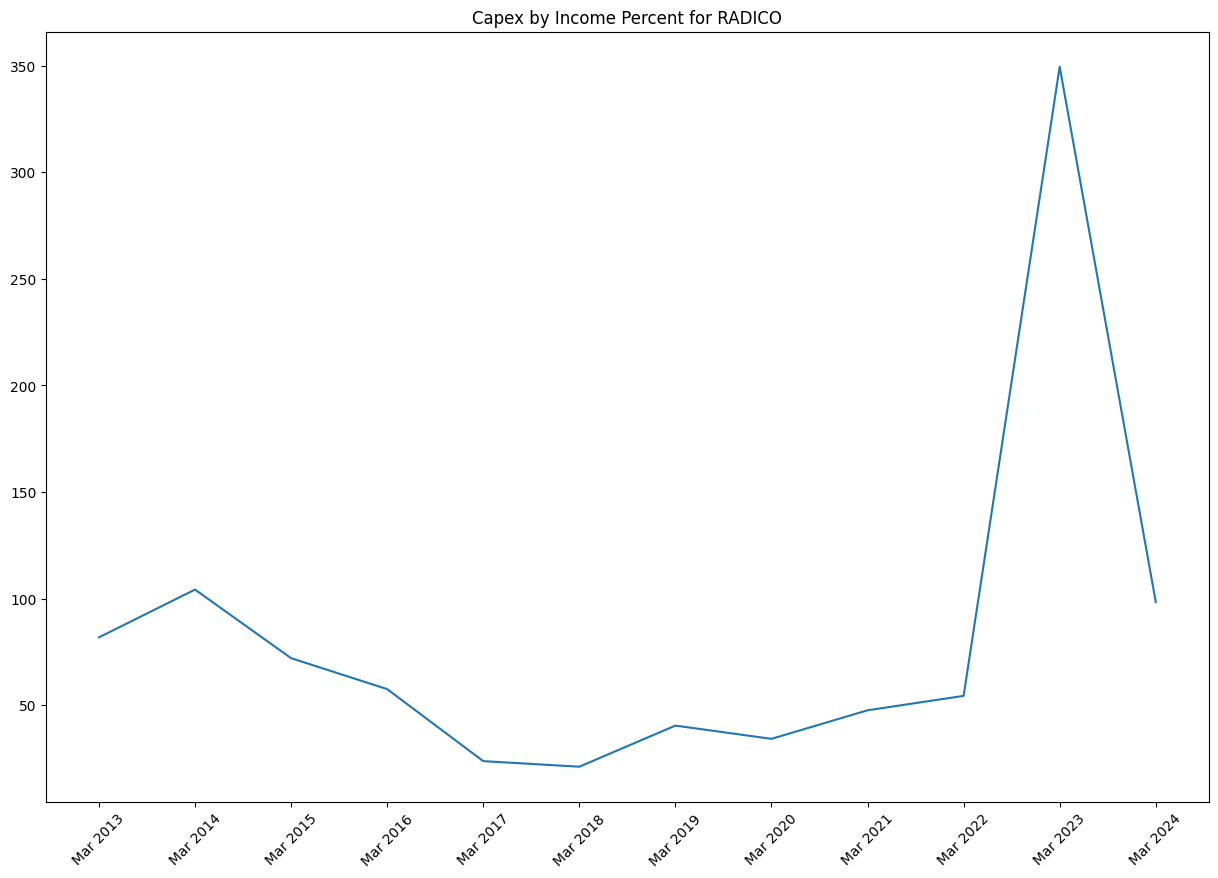

Capital expenditure (CapEx) represents the funds used by a company to acquire, upgrade, or maintain physical assets such as property, buildings, machinery, equipment, and technology. Unlike operating expenses, which are ongoing costs for running the day-to-day operations of a business, capital expenditures are typically long-term investments that provide benefits over several years.


In [2519]:
plt.figure(figsize=(15, 10))
plt.title(f"Capex by Income Percent for {company}")
plt.xticks(range(len(year_list)), year_list, rotation=45)
plt.plot(capex_list)
plt.show()
print("Capital expenditure (CapEx) represents the funds used by a company to acquire, upgrade, or maintain physical assets such as property, buildings, machinery, equipment, and technology. Unlike operating expenses, which are ongoing costs for running the day-to-day operations of a business, capital expenditures are typically long-term investments that provide benefits over several years.")


In [2520]:
# return on assets
return_on_assets = []
for i in range(12):
    return_on_assets.append(net_profit_list[i] / total_assets[i] * 100)


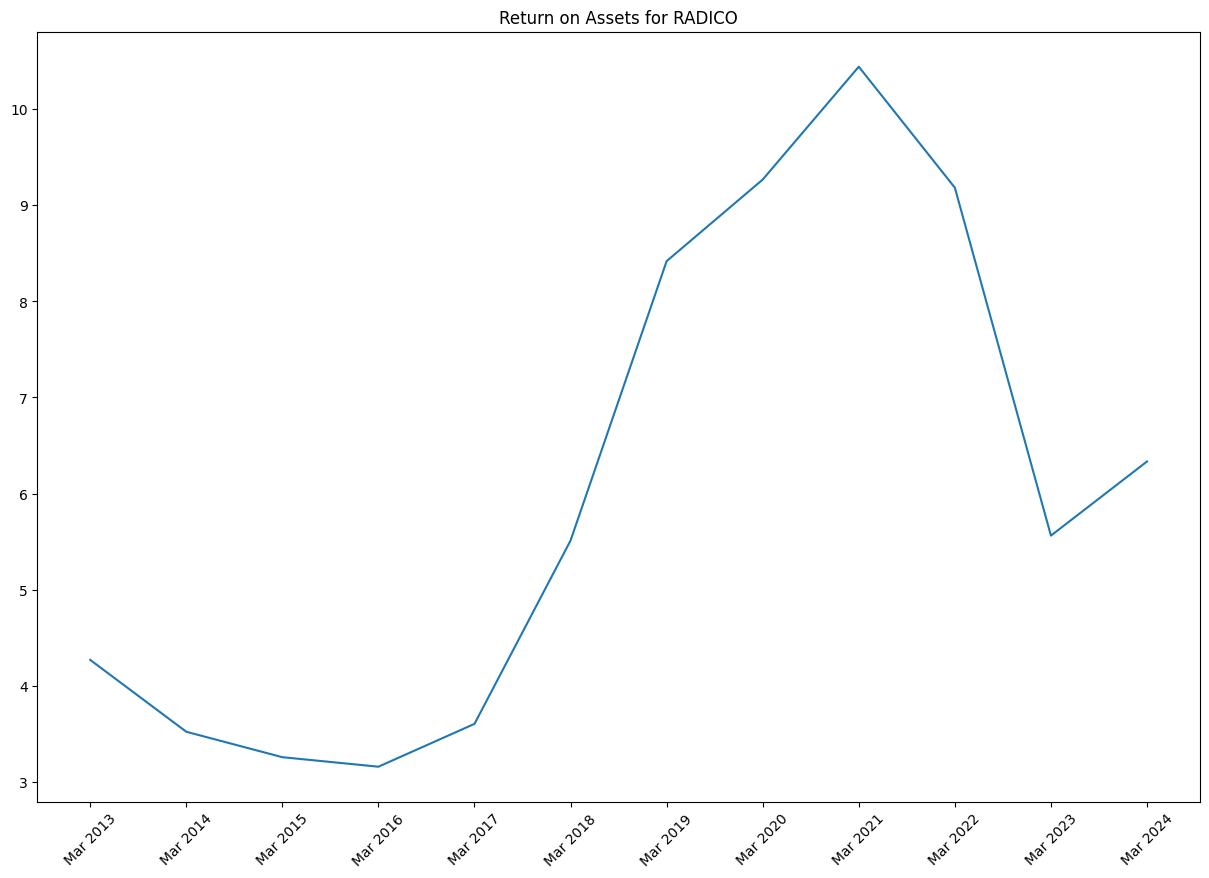

Return on Assets (ROA) is a financial metric that measures how efficiently a company uses its assets to generate profit.


In [2521]:
plt.figure(figsize=(15, 10))
plt.title(f"Return on Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(return_on_assets)
plt.show()
print("Return on Assets (ROA) is a financial metric that measures how efficiently a company uses its assets to generate profit.")

In [2522]:
# return on equity
return_on_equity = []
for i in range(12):
    return_on_equity.append(net_profit_list[i] / equity[i] * 100)
    

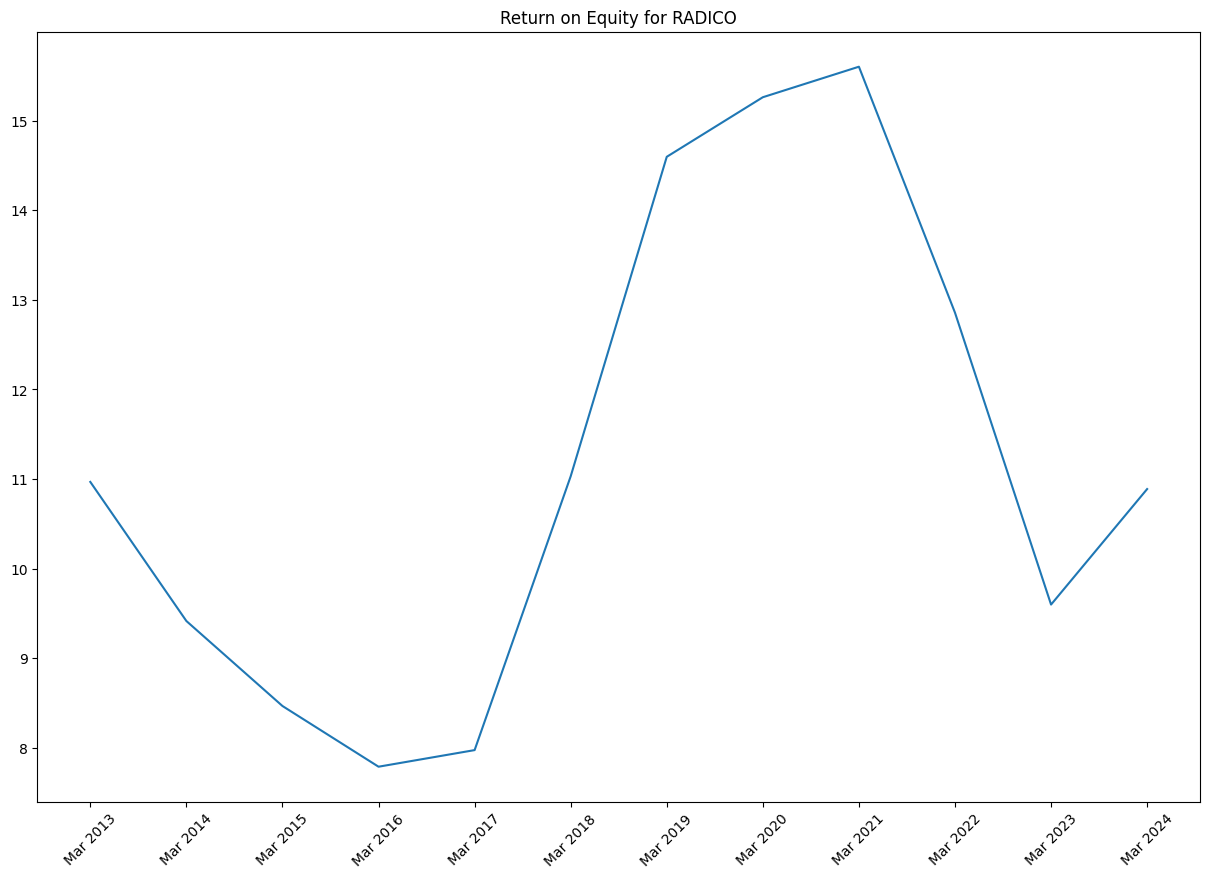

Return on Equity (ROE) is a financial metric that measures how effectively a company uses shareholders' equity to generate profit.


In [2523]:

plt.figure(figsize=(15, 10))
plt.title(f"Return on Equity for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(return_on_equity)
plt.show()
print("Return on Equity (ROE) is a financial metric that measures how effectively a company uses shareholders' equity to generate profit.")

In [2524]:
# cash equivalents by total_assets

cash_equivalents_by_total_assets = []
for i in range(12):
    cash_equivalents_by_total_assets.append(cash_equivalents[i] / total_assets[i] * 100)


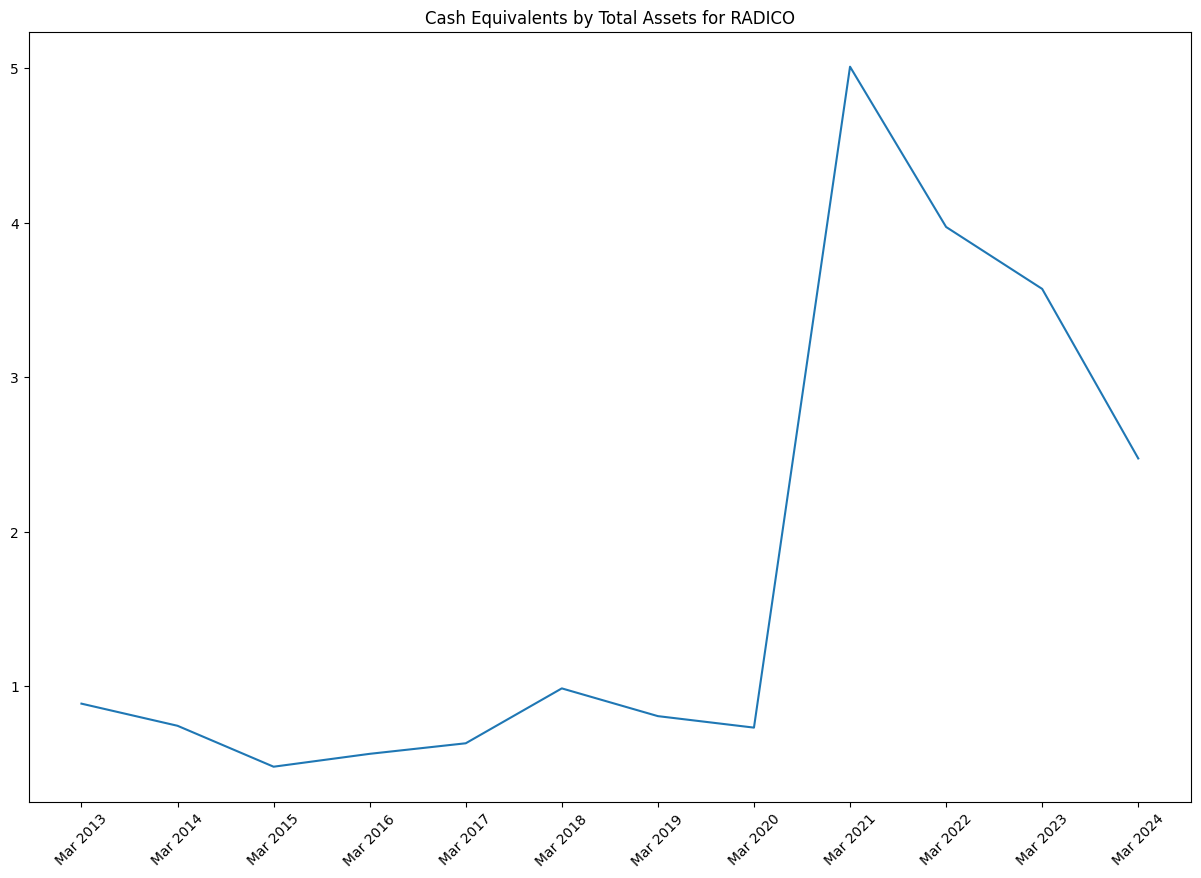

In [2525]:
plt.figure(figsize=(15, 10))
plt.title(f"Cash Equivalents by Total Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(cash_equivalents_by_total_assets)
plt.show()


In [2526]:
debt_to_equity = []
for i in range(12):
    debt_to_equity.append(borrowings[i] / equity[i])
    

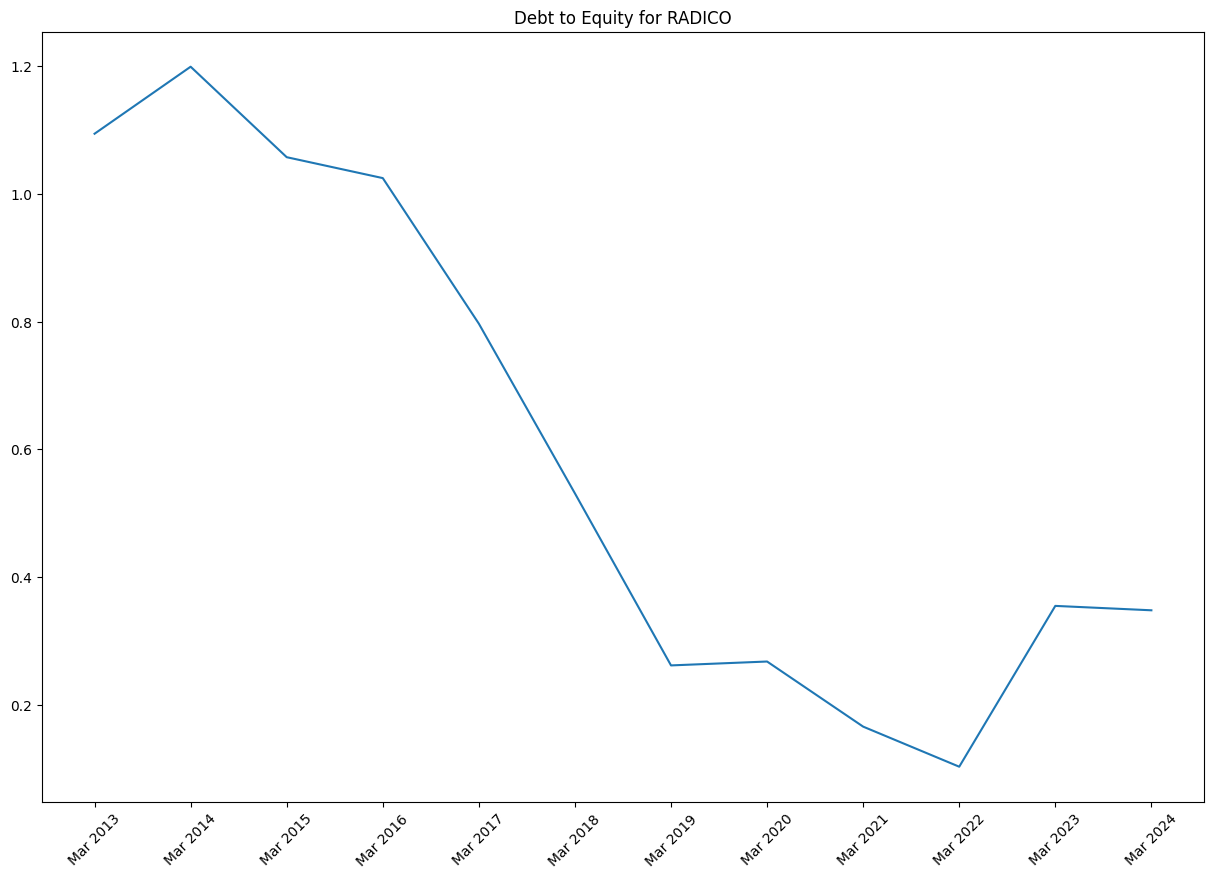

The debt-to-equity (D/E) ratio is a financial metric that shows the proportion of a company's financing that comes from debt compared to equity. It is calculated by dividing a company's total liabilities by its shareholders' equity.


In [2527]:
plt.figure(figsize=(15, 10))
plt.title(f"Debt to Equity for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(debt_to_equity)
plt.show()
print("The debt-to-equity (D/E) ratio is a financial metric that shows the proportion of a company's financing that comes from debt compared to equity. It is calculated by dividing a company's total liabilities by its shareholders' equity.")


In [2528]:
# trade receivables by total assests
trade_receivables_by_total_assets = []
for i in range(12):
    trade_receivables_by_total_assets.append(trade_receivables[i] / total_assets[i] * 100)


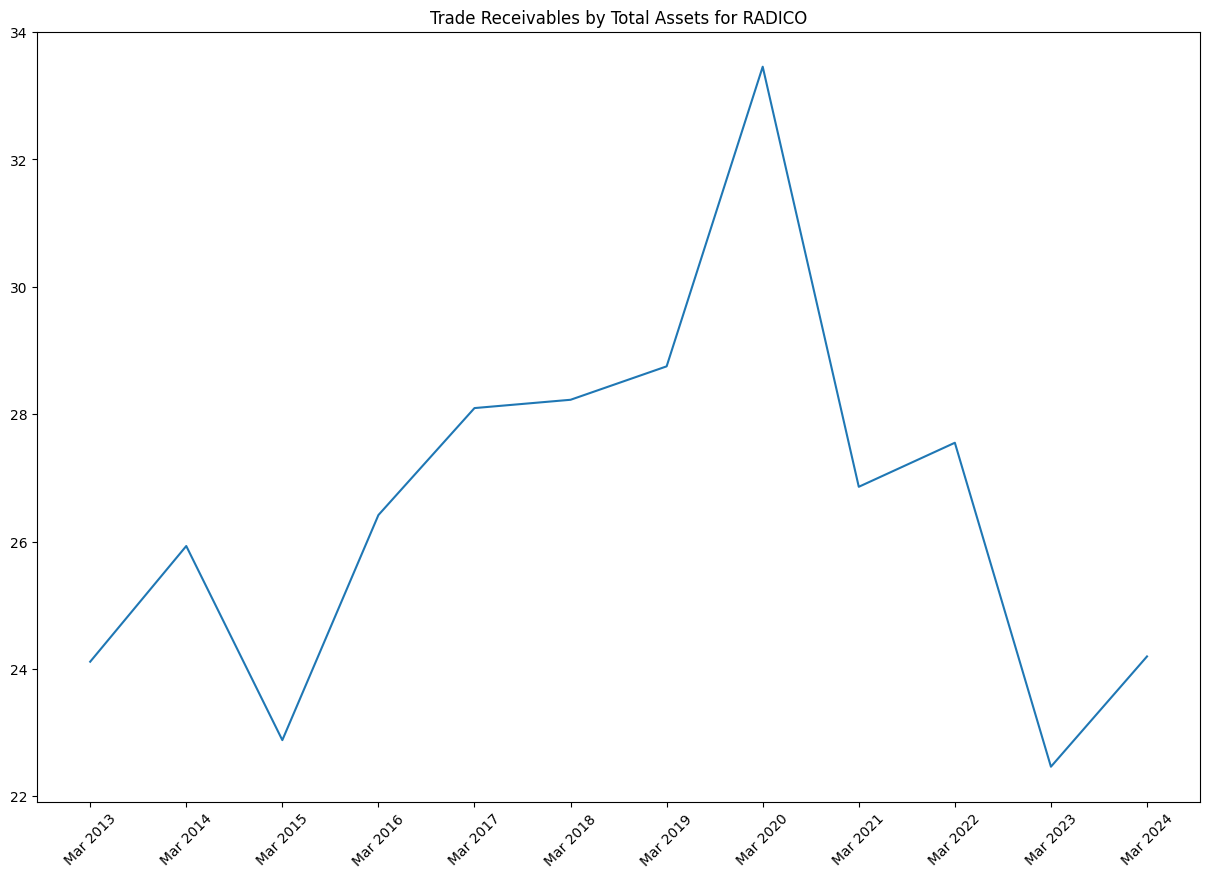

Trade receivables are the amounts owed to a company by its customers for goods or services that have been delivered but not yet paid for. They are considered a type of current asset and are typically recorded on a company's balance sheet as accounts receivable.


In [2529]:
plt.figure(figsize=(15, 10))
plt.title(f"Trade Receivables by Total Assets for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(trade_receivables_by_total_assets)
plt.show()
print("Trade receivables are the amounts owed to a company by its customers for goods or services that have been delivered but not yet paid for. They are considered a type of current asset and are typically recorded on a company's balance sheet as accounts receivable.")


In [2530]:
interest_by_sales = []
for i in range(12):
    interest_by_sales.append(interest_list[i] / sales_list[i] * 100)


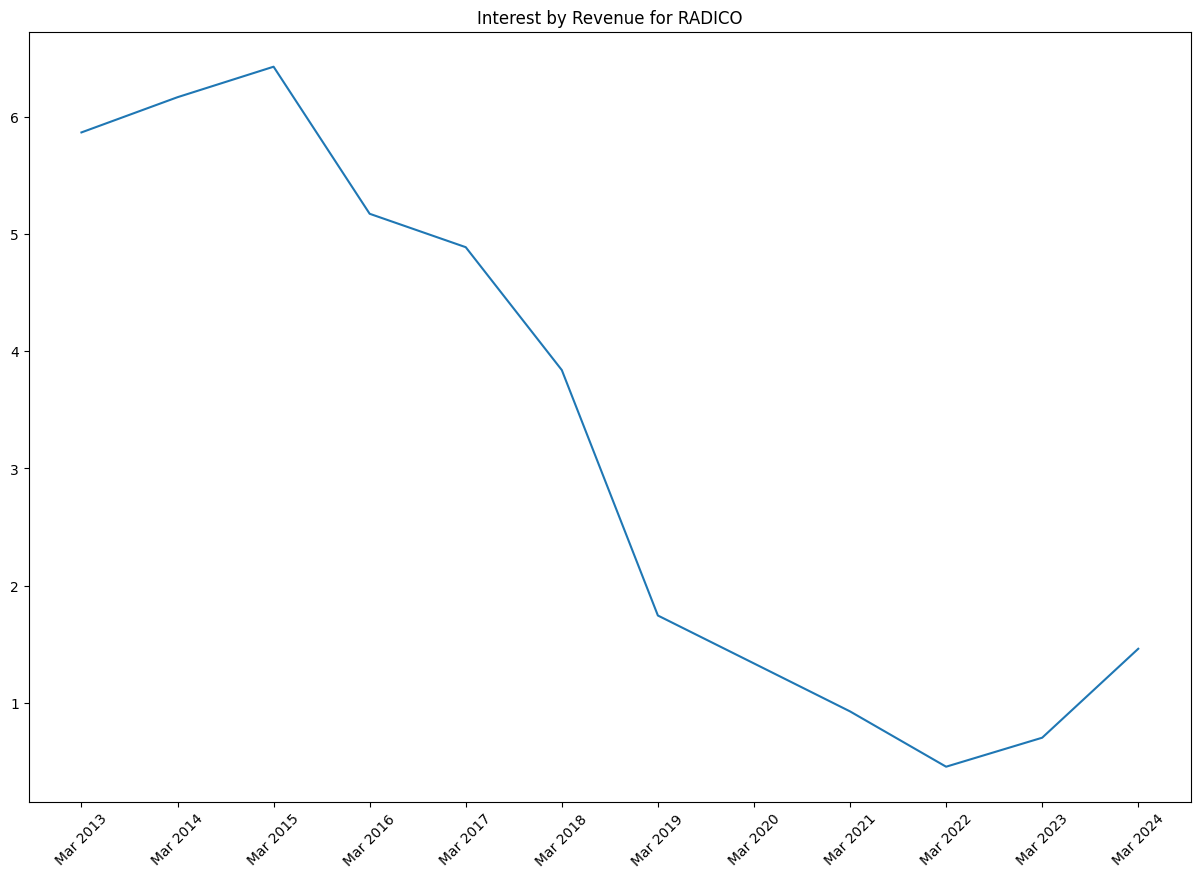

Interest is the cost of borrowing money. It is calculated as a percentage of the principal amount borrowed and is typically paid periodically, such as monthly or annually.


In [2531]:
plt.figure(figsize=(15, 10))
plt.title(f"Interest by Revenue for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(interest_by_sales)
plt.show()
print("Interest is the cost of borrowing money. It is calculated as a percentage of the principal amount borrowed and is typically paid periodically, such as monthly or annually.")

In [2532]:
depreciation_by_sales = []
for i in range(12):
    depreciation_by_sales.append(depreciation_list[i] / sales_list[i] * 100)
   

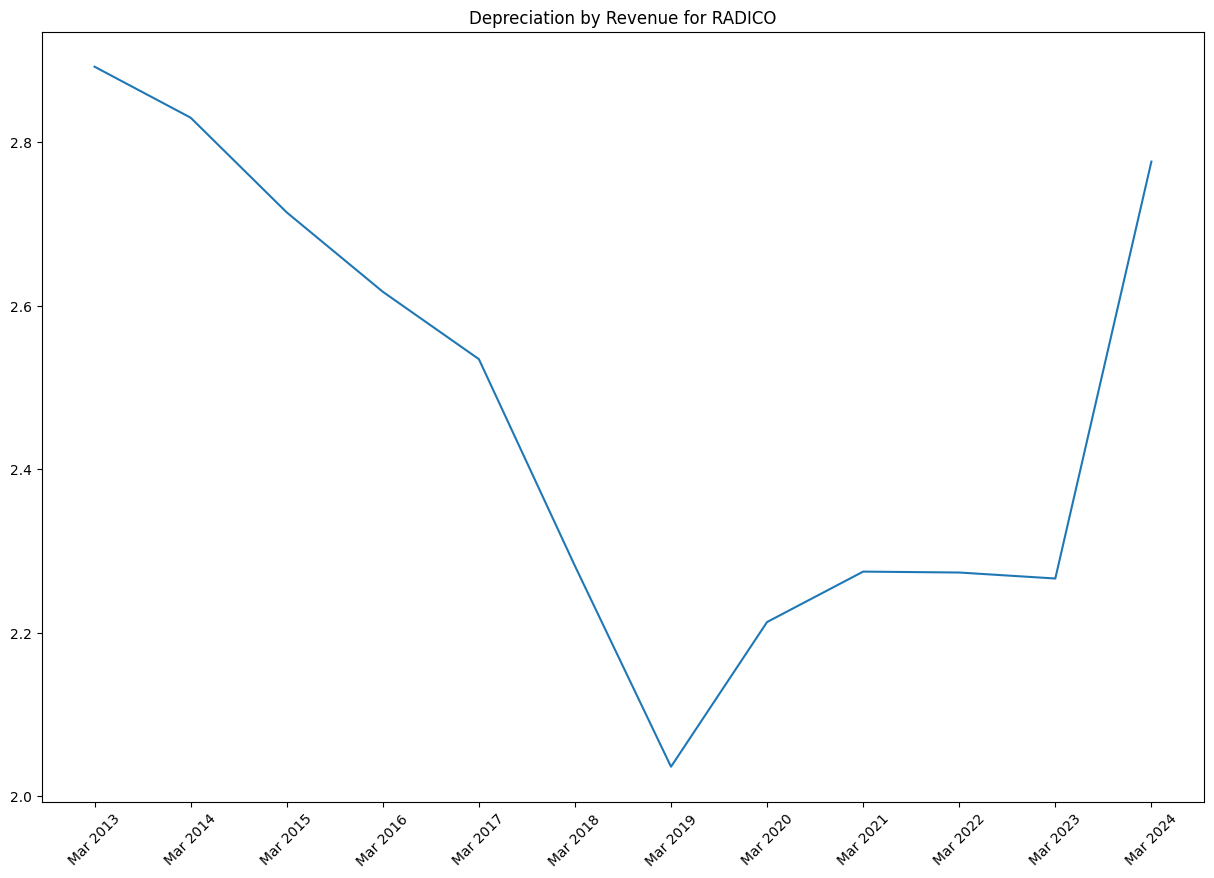

Depreciation is an accounting method used to allocate the cost of tangible assets over their useful life. It is a non-cash expense that reduces the value of an asset over time.


In [2533]:
plt.figure(figsize=(15, 10))
plt.title(f"Depreciation by Revenue for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(depreciation_by_sales)
plt.show()
print("Depreciation is an accounting method used to allocate the cost of tangible assets over their useful life. It is a non-cash expense that reduces the value of an asset over time.")

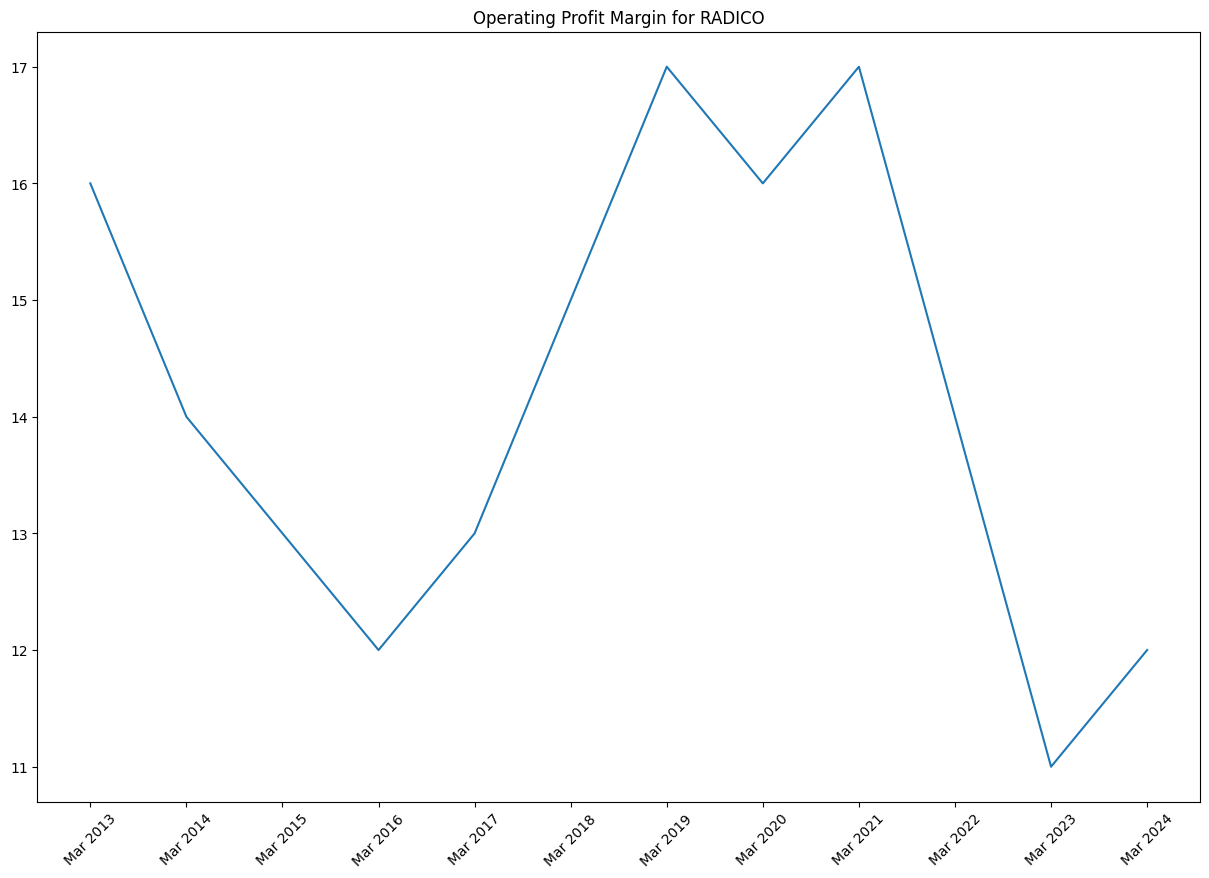

In [2534]:
# plot opm
plt.figure(figsize=(15, 10))
plt.title(f"Operating Profit Margin for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(opm_percent_list)
plt.show()


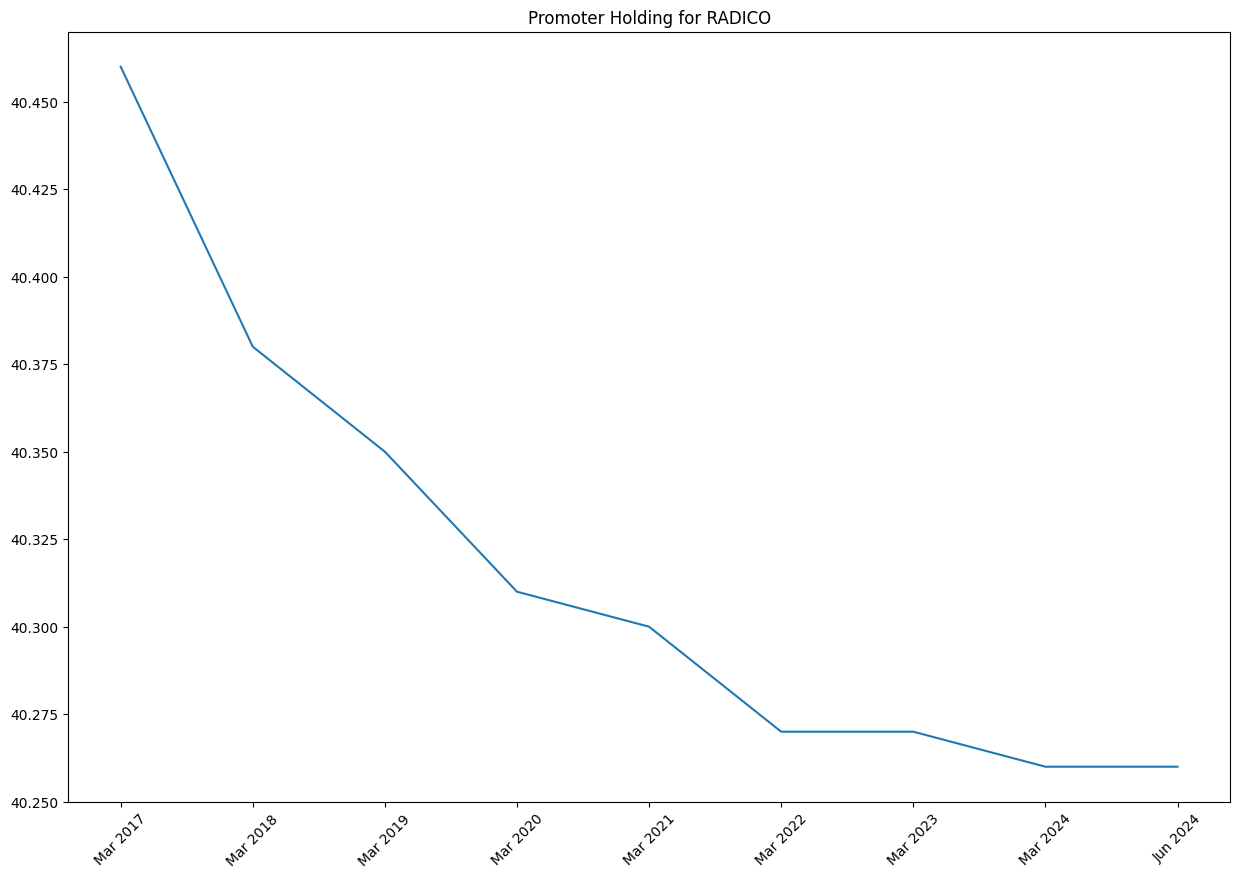

Promoter holding refers to the percentage of shares held by the promoters or founders of a company. It is an important indicator of the level of control and ownership that the promoters have over the company.


In [2535]:
# plot promoter holding
plt.figure(figsize=(15, 10))
plt.title(f"Promoter Holding for {company}")
plt.xticks(range(len(promoter_holding_years)), promoter_holding_years, rotation=45)
plt.plot(promoter_holding)
plt.show()
print("Promoter holding refers to the percentage of shares held by the promoters or founders of a company. It is an important indicator of the level of control and ownership that the promoters have over the company.")


In [2536]:
compounded_profit_growth = net_profit_list[-1] / net_profit_list[0]
compounded_profit_growth = compounded_profit_growth ** (1/len(net_profit_list)) - 1

In [2537]:
compounded_profit_growth *= 100

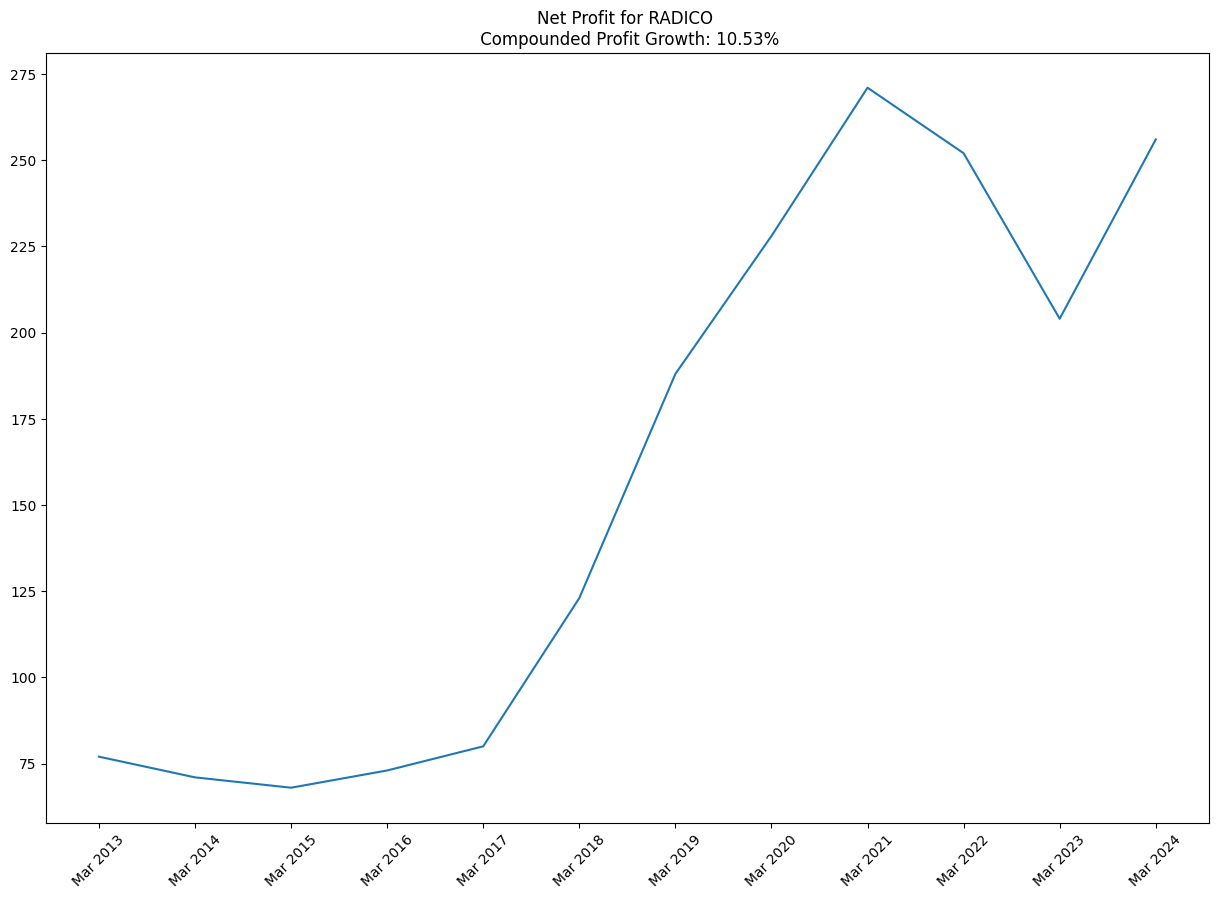

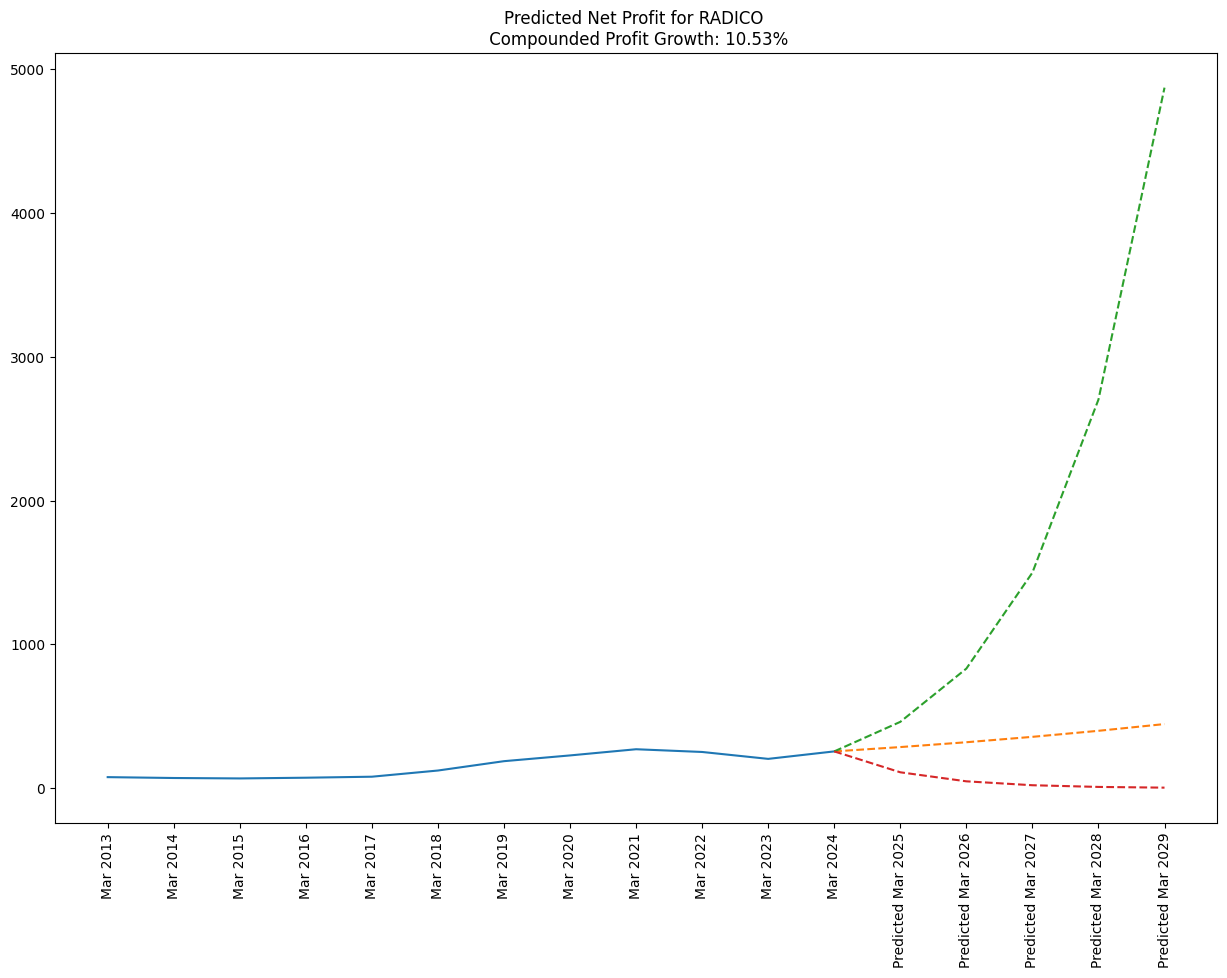

In [2538]:
# plot net profit
plt.figure(figsize=(15, 10))
plt.title(f"Net Profit for {company} \n Compounded Profit Growth: {compounded_profit_growth:.2f}%")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(net_profit_list)
plt.show()
confidence_index_graph(f"Net Profit for {company} \n Compounded Profit Growth: {compounded_profit_growth:.2f}%", year_list, [net_profit_list], 5)

In [2539]:
price_willing_to_pay = eps[-1] * compounded_profit_growth

In [2540]:
price_willing_to_pay

201.43370669927117

In [2541]:
cmp_info = soup.find('div', {'class': 'company-info'})

In [2542]:
book_value = cmp_info.findAll('li')[4].find('span', {'class': 'value'}).text.replace('₹', '').strip()
current_price = cmp_info.findAll('li')[1].find('span', {'class': 'value'}).text.replace('₹', '').replace(',', '').strip()


In [2543]:
cmp_info.find_all('p')[0].contents[0]

'Incorporated in the year 1943, Radico Khaitan is one of the most recognised IMFL (Indian Made Foreign Liquor) brands in India. '

In [2544]:
cmp_info.find_all('p')[1].text

'The company was initially known as Rampur Distillery Company and was focussed on distillation and bottling for branded players  and canteen stores of armed forces. '

In [2545]:
peer_info = soup.find('section', {'id': 'peers'})
peer_info = peer_info.find('p').find_all('a')
sector = peer_info[0].text.strip()
industry = peer_info[1].text.strip()


In [2546]:
sector

'Alcoholic Beverages'

In [2547]:
industry

'Breweries & Distilleries'

In [2548]:
url = f'https://www.screener.in/wiki/company/{company_id}/commentary/v2/'

headers = {
    'authority': 'www.screener.in',
'method':'GET',
'path':f'/wiki/company/{company_id}/commentary/v2/',
'scheme':'https',
'accept':'*/*',
'accept-encoding':'gzip, deflate, br, zstd',
'accept-language':'en-US,en;q=0.9',
'cookie':'csrftoken=14cOcxbER7QfBXEcyZeCwBvCFAbZYigJ; sessionid=rr3fp4r5umhqwrnh0bu8iyq5vfsxeg0l',
'priority':'u=1, i',
# 'referer':'https://www.screener.in/company/TATAELXSI/',
'sec-ch-ua':'"Not)A;Brand";v="99", "Microsoft Edge";v="127", "Chromium";v="127"',
'sec-ch-ua-mobile':'?0',
'sec-ch-ua-platform':'"Windows"',
'sec-fetch-dest':'empty',
'sec-fetch-mode':'cors',
'sec-fetch-site':'same-origin',
'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/',
'x-requested-with':'XMLHttpRequest'
}
resp = requests.get(url, headers=headers)
soup_key_insights = BeautifulSoup(resp.content, 'html.parser')
key_insights = ''
for para in soup_key_insights.find_all('p'):
    key_insights += para.text

In [2549]:
data = {
    'q' : 'Price to Earning-Median PE-EPS',
    'days' : '10000',
    'consolidated' : 'true',
}

In [2550]:
resp = requests.get(f'https://www.screener.in/api/company/{company_id}/chart/?q=Price+to+Earning-Median+PE-EPS&days=10000&consolidated=true')

In [2551]:
data = resp.json()
eps_data = data['datasets'][0]
pe_data = data['datasets'][1]

In [2552]:
resp = requests.get(f'https://www.screener.in/api/company/{company_id}/chart/?q=Price-DMA50-DMA200-Volume&days=10000&consolidated=true')
data = resp.json()
price_data = data['datasets'][0]
dma50_data = data['datasets'][1]
dma200_data = data['datasets'][2]
volume_data = data['datasets'][3]

In [2553]:
pe_date_list = []
pe_list = []
for i in pe_data['values']:
    pe_date_list.append(i[0])
    pe_list.append(i[1])

In [2554]:
eps_date_list = []
eps_values_list = []
for i in eps_data['values']:
    eps_date_list.append(i[0])
    eps_values_list.append(i[1])

In [2555]:
print(eps_values_list)

[0.92, 0.92, 0.92, 0.92, 6.11, 6.11, 9.31, 9.31, 14.55, 14.55, 18.7, 18.53, 17.58, 17.58, 16.81, 18.15, 20.75, 21.95, 21.95, 21.82, 21.45, 19.69, 19.78, 19.78, 18.39, 17.05, 16.48, 16.95, 16.95, 17.73, 18.77, 19.61, 19.6, 20.29]


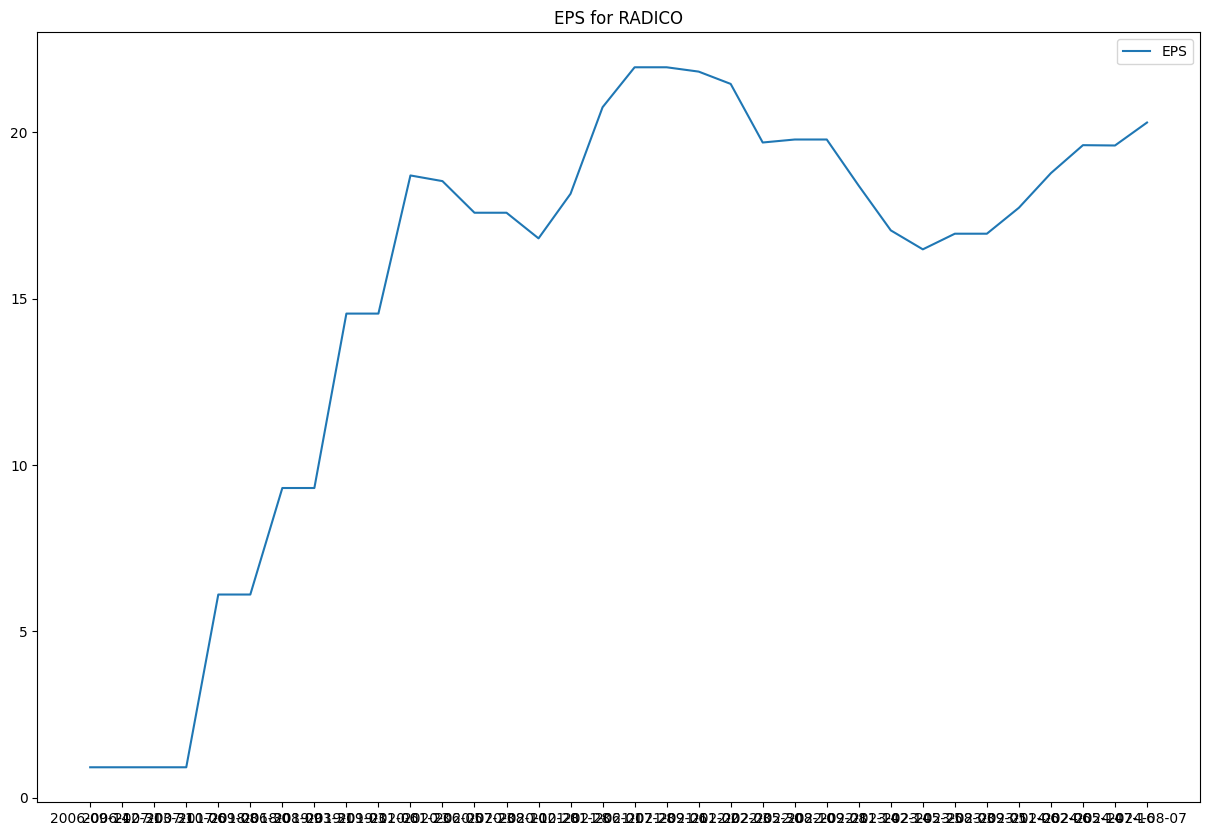

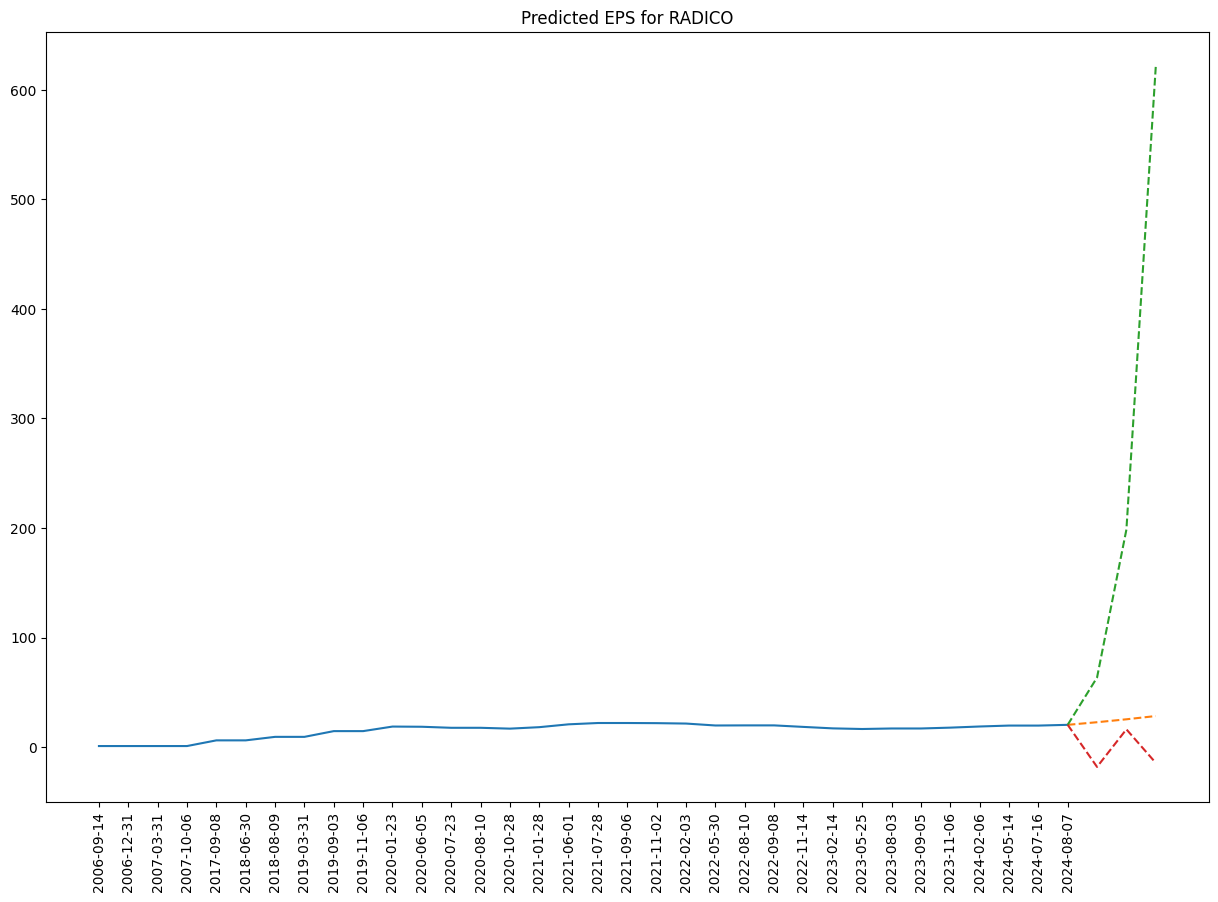

In [2556]:
plt.figure(figsize=(15, 10))
plt.title(f"EPS for {company}")
# plt.xticks(range(len(eps_date_list)), eps_date_list, rotation=90)
plt.plot(eps_date_list, eps_values_list, label='EPS')
plt.legend()
plt.show()
confidence_index_graph(f"EPS for {company}", eps_date_list, [eps_values_list], 3)

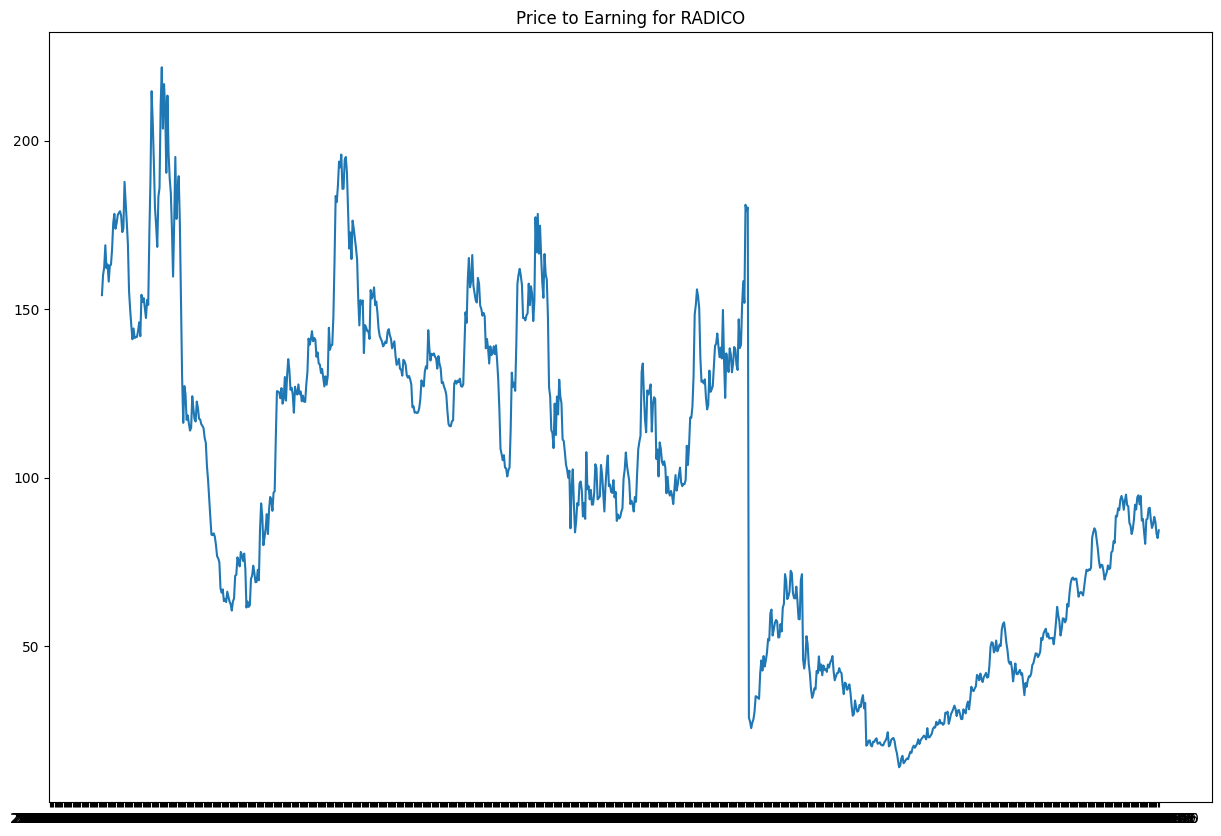

The price-to-earnings (P/E) ratio is a financial metric that shows the ratio of a company's stock price to its earnings per share (EPS). It is calculated by dividing the current market price of a company's stock by its EPS. The P/E ratio is a key indicator of a company's valuation and is used by investors to determine whether a stock is overvalued, undervalued, or fairly priced.


In [2557]:
plt.figure(figsize=(15, 10))
plt.title(f"Price to Earning for {company}")
# plt.xticks(range(len(eps_date_list)), eps_date_list, rotation=90)
plt.plot(pe_date_list, pe_list)
plt.show()
print("The price-to-earnings (P/E) ratio is a financial metric that shows the ratio of a company's stock price to its earnings per share (EPS). It is calculated by dividing the current market price of a company's stock by its EPS. The P/E ratio is a key indicator of a company's valuation and is used by investors to determine whether a stock is overvalued, undervalued, or fairly priced.")

In [2558]:
price_list = []
price_date_list = []
for i in price_data['values']:
    price_list.append(float(i[1]))
    price_date_list.append((i[0]))
    

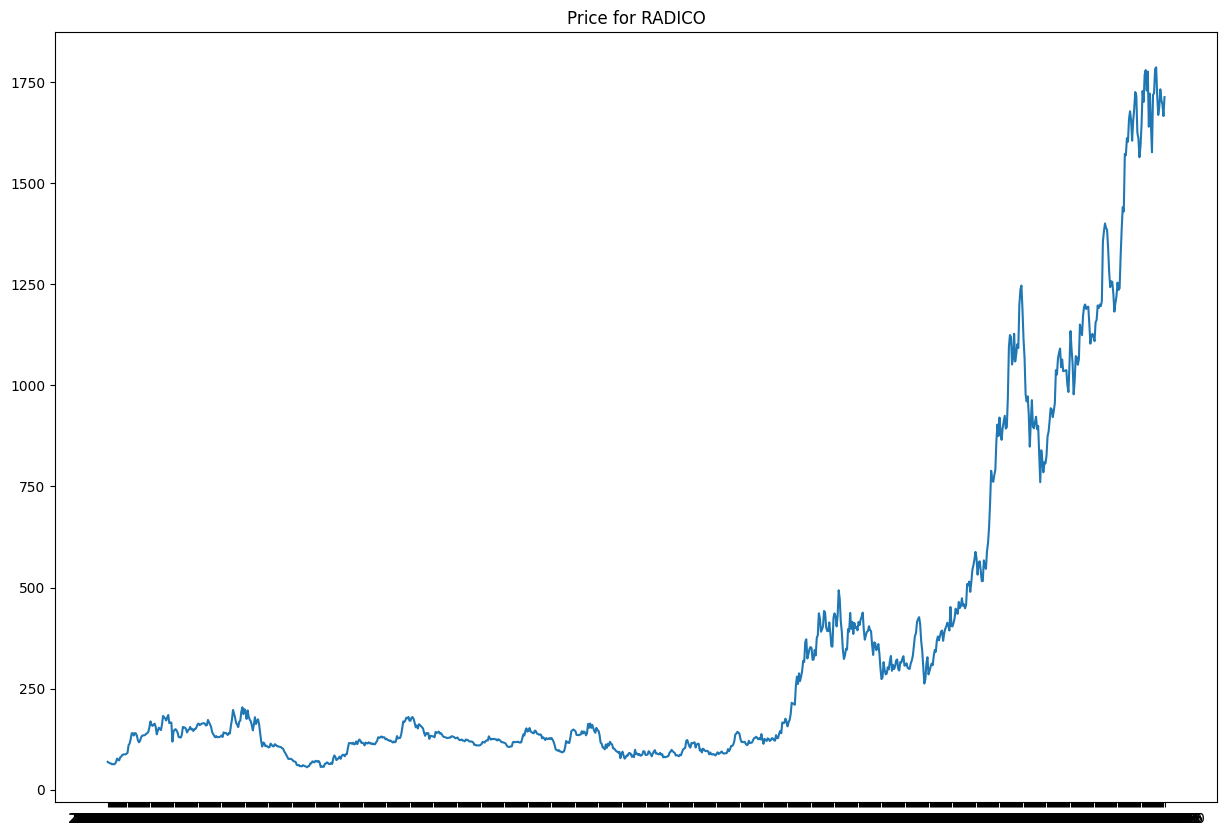

In [2559]:
# plt.figure(figsize=(100, 500))
plt.figure(figsize=(15, 10))
plt.title(f"Price for {company}")
plt.plot(price_date_list, price_list)
plt.show()


In [2560]:
# plot dma50 and dma200 on same graph
dma50_list = []
dma50_date_list = []
for i in dma50_data['values']:
    dma50_list.append(float(i[1]))
    dma50_date_list.append((i[0]))

dma200_list = []
dma200_date_list = []
for i in dma200_data['values']:
    dma200_list.append(float(i[1]))
    dma200_date_list.append((i[0]))


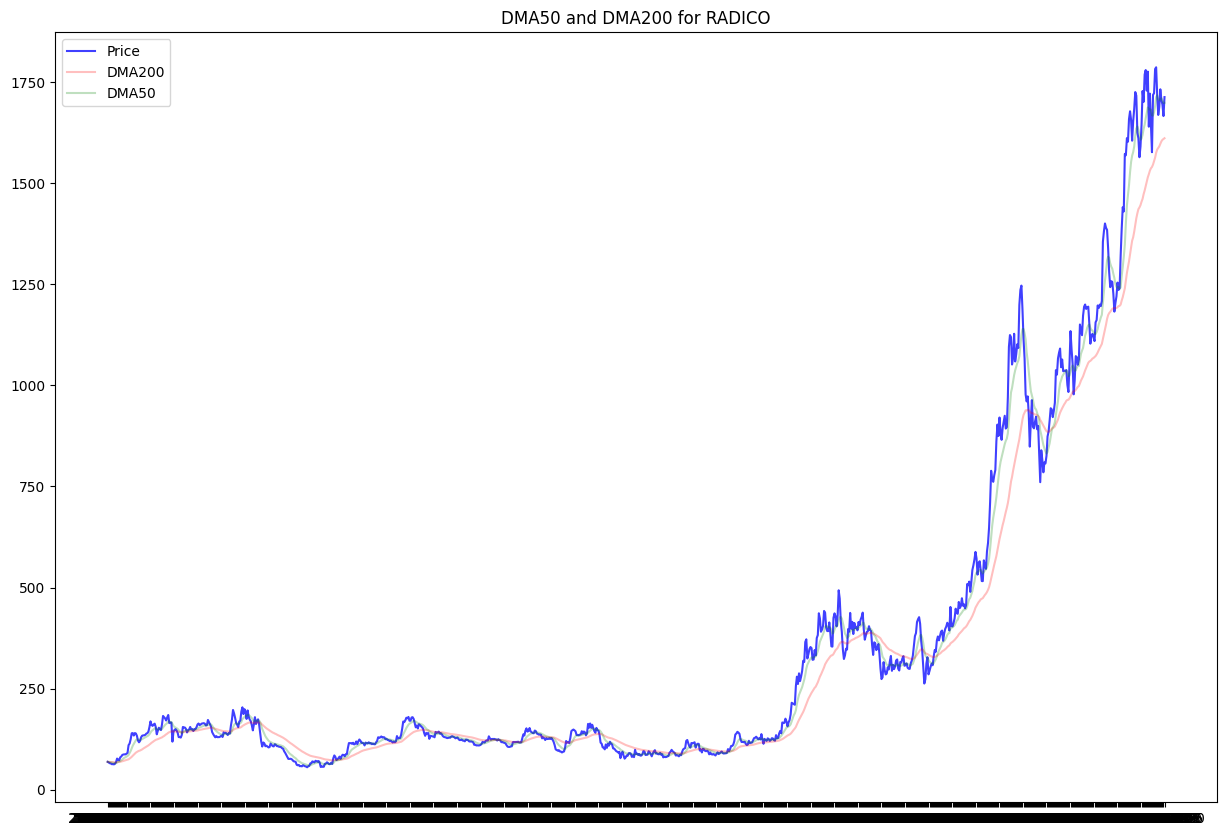

The 50-day moving average (DMA50) and 200-day moving average (DMA200) are technical indicators that show the average price of a security over a specified period. The DMA50 is calculated by adding up the closing prices of a security over the last 50 days and dividing the sum by 50. The DMA200 is calculated in a similar way but over the last 200 days. These moving averages are used by traders and investors to identify trends and potential buy or sell signals.


In [2561]:
plt.figure(figsize=(15, 10))
plt.title(f"DMA50 and DMA200 for {company}")
# plt.plot(price_date_list, price_list, label='Price')
plt.plot(price_date_list, price_list, label='Price', color='blue', alpha = 0.75)
plt.plot(dma200_date_list, dma200_list, label='DMA200', color='red', alpha=0.25)
plt.plot(dma50_date_list, dma50_list, label='DMA50', color='green', alpha=0.25)
plt.legend()
plt.show()
print("The 50-day moving average (DMA50) and 200-day moving average (DMA200) are technical indicators that show the average price of a security over a specified period. The DMA50 is calculated by adding up the closing prices of a security over the last 50 days and dividing the sum by 50. The DMA200 is calculated in a similar way but over the last 200 days. These moving averages are used by traders and investors to identify trends and potential buy or sell signals.")

In [2562]:
# plot volume
volume_list = []
volume_date_list = []
for i in volume_data['values']:
    volume_list.append(float(i[1]))
    volume_date_list.append((i[0]))

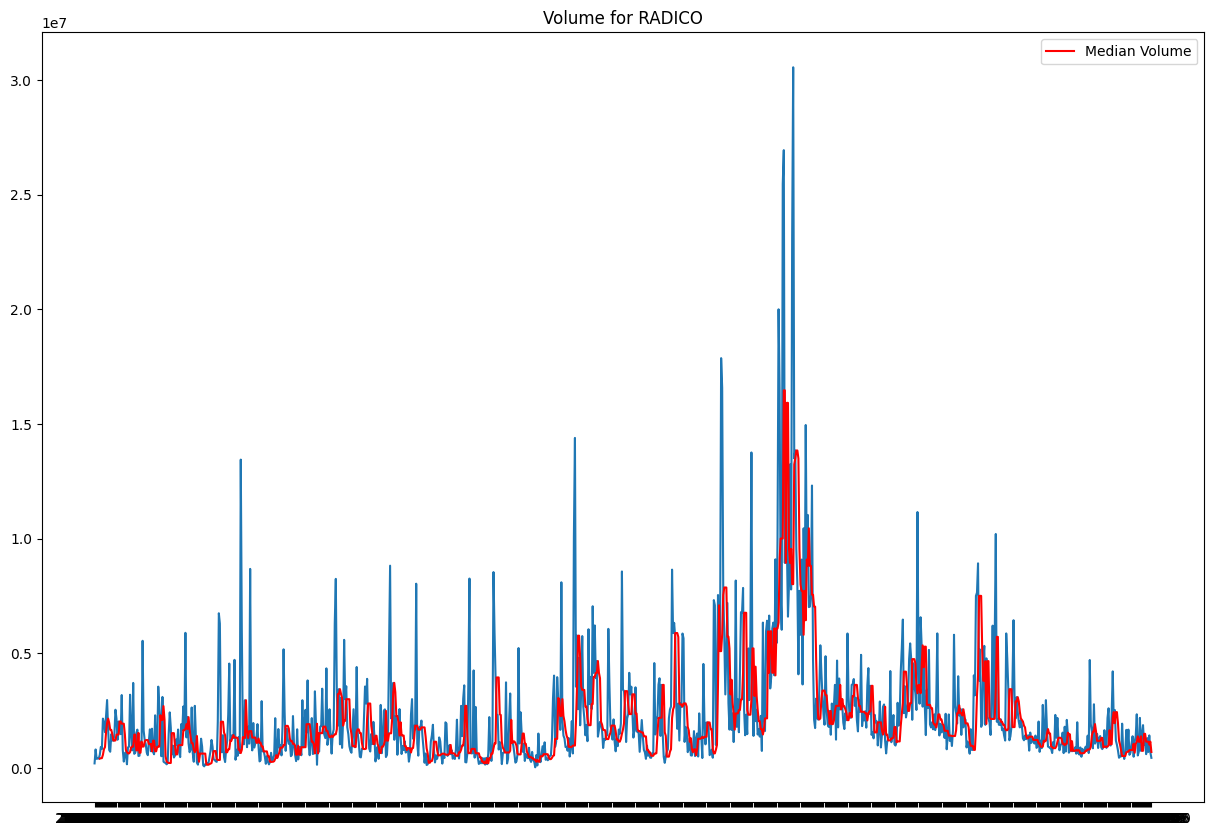

<Figure size 1500x1000 with 0 Axes>

Volume is a key technical indicator that shows the number of shares or contracts traded in a security or market during a given period. It is an important measure of market activity and liquidity and is used by traders and investors to identify trends and potential buy or sell signals.


In [2563]:
volume_moving_median = []
voume_window_length = 5
for i in range(voume_window_length, len(volume_list)):
    volume_moving_median.append(statistics.median(volume_list[i-voume_window_length:i]))
plt.figure(figsize=(15, 10))
plt.title(f"Volume for {company}")
plt.plot(volume_date_list, volume_list)
plt.plot(range(voume_window_length, len(volume_list)), volume_moving_median, color='red', label='Median Volume')
plt.legend()
plt.figure(figsize=(15, 10)); plt.show()
print("Volume is a key technical indicator that shows the number of shares or contracts traded in a security or market during a given period. It is an important measure of market activity and liquidity and is used by traders and investors to identify trends and potential buy or sell signals.")

In [2564]:
from matplotlib.ticker import MaxNLocator

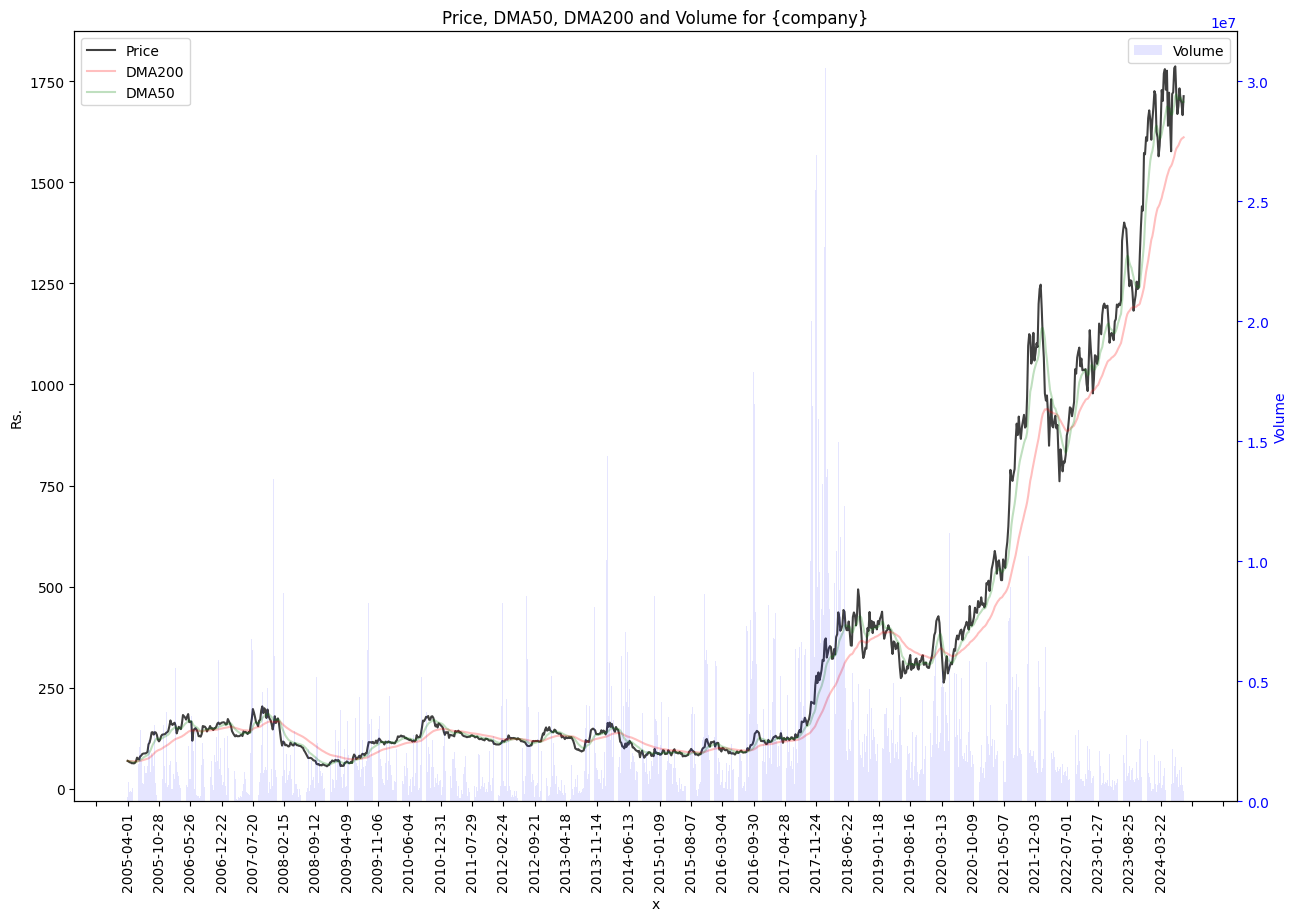

In [2565]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax1.plot(price_date_list, price_list, label='Price', color='black', alpha = 0.75)
ax1.plot(dma200_date_list, dma200_list, label='DMA200', color='red', alpha=0.25)
ax1.plot(dma50_date_list, dma50_list, label='DMA50', color='green', alpha=0.25)
ax1.xaxis.set_major_locator(MaxNLocator(nbins=44))
ax1.set_xlabel('x')
# rotate x-axis labels
plt.xticks(rotation=90)
ax1.set_ylabel('Rs.', color='black')
ax1.tick_params('y', colors='black')

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.bar(volume_date_list, volume_list, label='Volume', color= 'blue', alpha=0.1)
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params('y', colors='blue')

# Add a title
plt.title('Price, DMA50, DMA200 and Volume for {company}')

# Adding legends for clarity
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

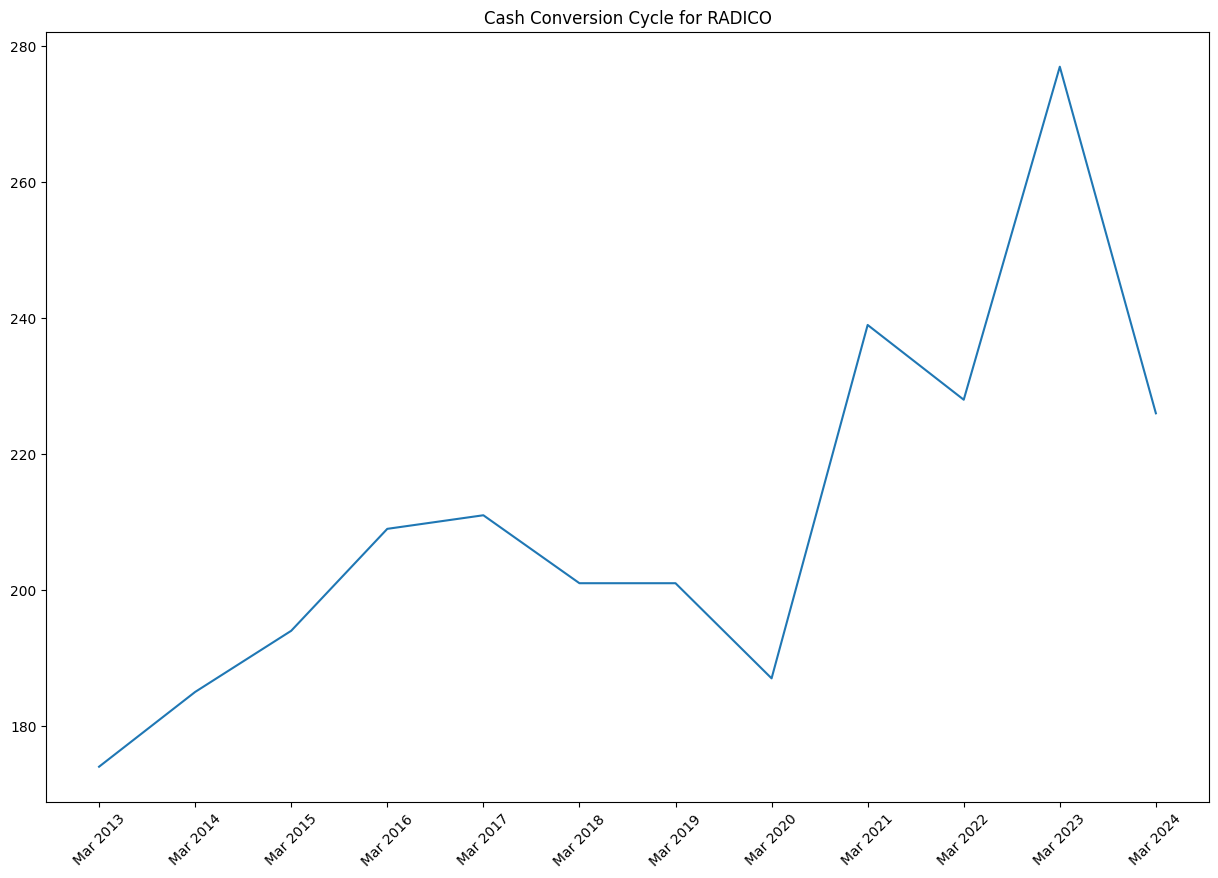

The cash conversion cycle is a financial metric that shows the amount of time it takes for a company to convert its investments in inventory and other resources into cash flow from sales. It is calculated by adding the days inventory outstanding (DIO) to the days sales outstanding (DSO) and subtracting the days payable outstanding (DPO). A shorter cash conversion cycle indicates that a company is able to generate cash flow more quickly and efficiently.


In [2566]:
# plot cash conversion
plt.figure(figsize=(15, 10))
plt.title(f"Cash Conversion Cycle for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(cash_conversion_cycle)
plt.show()
print("The cash conversion cycle is a financial metric that shows the amount of time it takes for a company to convert its investments in inventory and other resources into cash flow from sales. It is calculated by adding the days inventory outstanding (DIO) to the days sales outstanding (DSO) and subtracting the days payable outstanding (DPO). A shorter cash conversion cycle indicates that a company is able to generate cash flow more quickly and efficiently.")

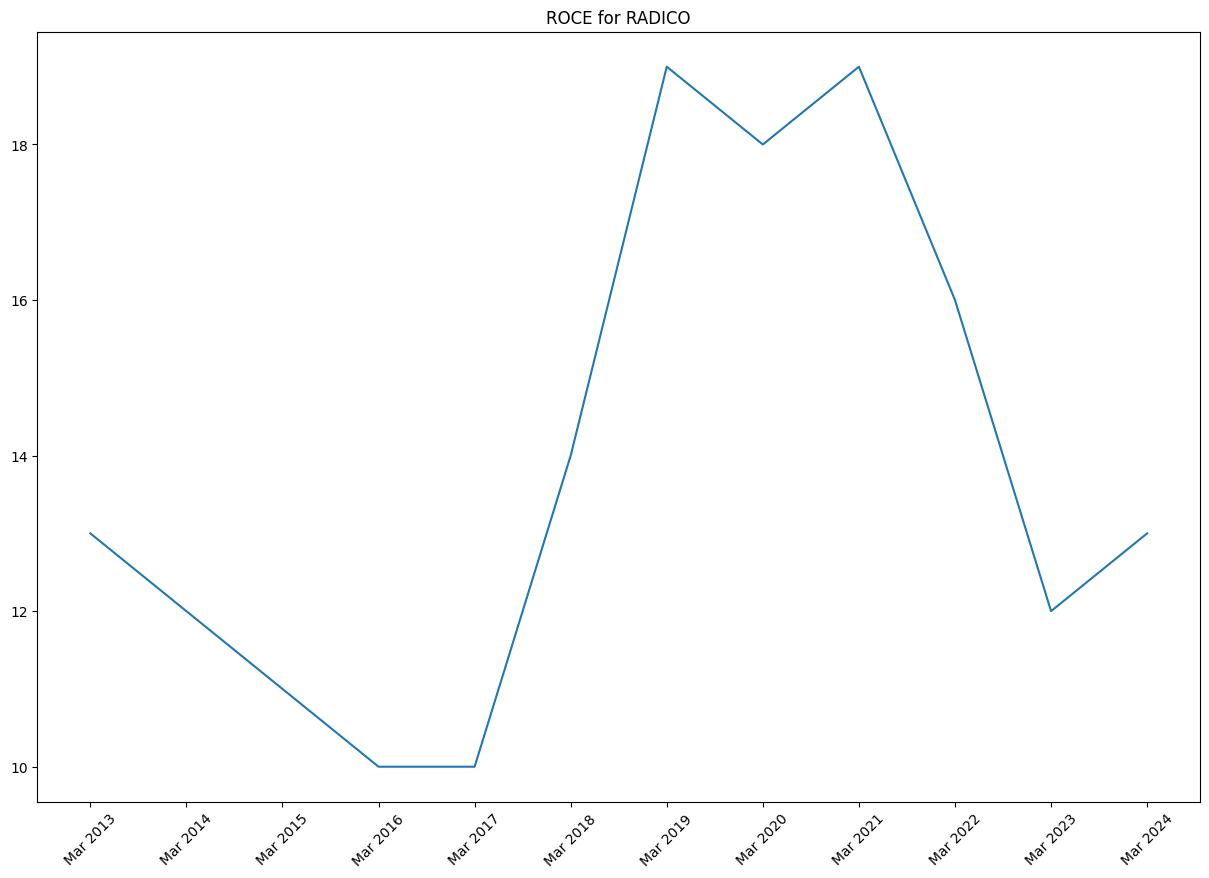

Return on capital employed (ROCE) is a financial metric that shows the percentage return a company earns on its invested capital. It is calculated by dividing a company's earnings before interest and taxes (EBIT) by its total capital employed. ROCE is a key indicator of a company's profitability and efficiency in using its capital to generate returns for shareholders.


In [2567]:
# plot roce
plt.figure(figsize=(15, 10))
plt.title(f"ROCE for {company}")
plt.xticks(range(12), year_list, rotation=45)
plt.plot(roce_percent)
plt.show()
print("Return on capital employed (ROCE) is a financial metric that shows the percentage return a company earns on its invested capital. It is calculated by dividing a company's earnings before interest and taxes (EBIT) by its total capital employed. ROCE is a key indicator of a company's profitability and efficiency in using its capital to generate returns for shareholders.")


In [2568]:
number_of_shares = net_profit_list[-1] * 10**7 / eps[-1]
number_of_shares

133821223.2096184

In [2569]:
compounded_profit_growth_decimal = compounded_profit_growth / 100
compunded_sales_growth_decimal = compunded_sales_growth / 100

In [2570]:
# calculate free cash flow
free_cash_flow = []
for i in range(len(year_list)):
    free_cash_flow.append(net_profit_list[i] + depreciation_list[i] - capex_list[i] - interest_list[i])

print(f'value of free_cash_flow is {free_cash_flow}')

# intrinsic value calculation

intrinsic_value = eps[-1] * compounded_profit_growth

print(f'value of intrinsic_value is {intrinsic_value}')


# calculate price to sales ratio

price_to_sales = price_list[-1] / sales_list[-1]

print(f'value of price_to_sales is {price_to_sales}')

# calculate price to earnings ratio

price_to_earnings = price_list[-1] / eps[-1]

print(f'value of price_to_earnings is {price_to_earnings}')

# calculate price to book value ratio

price_to_book_value = float(current_price.replace(',', '')) / float(book_value.replace(',',''))
print(f'value of price_to_book_value is {price_to_book_value}')

# calculate price to free cash flow ratio

price_to_free_cash_flow = price_list[-1] / free_cash_flow[-1]

print(f'value of price_to_free_cash_flow is {price_to_free_cash_flow}')

# calculate price to operating cash flow ratio

operating_cash_flow = []
for i in range(len(year_list)):
    operating_cash_flow.append(net_profit_list[i] + depreciation_list[i])

price_to_operating_cash_flow = price_list[-1] / operating_cash_flow[-1]

print(f'value of price_to_operating_cash_flow is {price_to_operating_cash_flow}')




value of free_cash_flow is [-40.81818181818183, -79.22535211267605, -56.05882352941177, -26.534246575342465, 17.25, 73.86178861788619, 153.5744680851064, 214.78947368421052, 255.39852398523988, 249.63492063492066, -96.50980392156862, 211.5625]
value of intrinsic_value is 201.43370669927117
value of price_to_sales is 0.4171212859230395
value of price_to_earnings is 89.52953476215369
value of price_to_book_value is 9.623595505617978
value of price_to_free_cash_flow is 8.095480059084196
value of price_to_operating_cash_flow is 4.628918918918919


In [2571]:
print(sector)
print(industry)
print(key_insights)


Alcoholic Beverages
Breweries & Distilleries
Incorporated in the year 1943, Radico Khaitan is one of the most recognised IMFL (Indian Made Foreign Liquor) brands in India. [1]The company was initially known as Rampur Distillery Company and was focussed on distillation and bottling for branded players  and canteen stores of armed forces. Later on in  the year 1997, Radico Khaitan  ventured into its own branded IMFL products and launched its first brand  8PM whisky which became its millionarie brand within a year of its launch. [2]History
Radico Khaitan Limited is among the oldest and largest manufacturers of IMFL in India. Earlier known as Rampur Distillery Company, Radico Khaitan commenced its operations in 1943 and has emerged as a major bulk spirits supplier and bottler to other spirit manufacturers. In 1998 Company started its own brands with the
introduction of 8PM Whisky.Brands[1]
After Dark Whisky, Contessa Rum, Jaisalmer Indian Craft Gin, Magic Moments Vodka, Magic Moments Dazzl

In [2572]:
valuations = ['DCF', 'Reverse DCF', 'PE', 'PB', 'PS', 'EV/EBITDA', 'EV/Sales', 'PEG', 'Dividend Yield', 'FCF Yield', 'Earnings Yield', 'Price to Sales', 'Price to Book', 'Price to Earnings', 'Enterprise Value to EBITDA', 'Enterprise Value to Sales', 'Price to Free Cash Flow', 'Price to Operating Cash Flow', 'Price to Tangible Book', 'Price to Cash']


In [2613]:
print('Enter the comapies for portfolio')
portfolio = {}
companies = []
while True:
    company = input('Enter the company name: ')
    if company == '':
        break
    companies.append(company)

for company in companies:
    number_of_shares = int(input(f'Enter the number of shares for {company}: '))
    portfolio[company] = number_of_shares


Enter the comapies for portfolio


In [2602]:
# portfolio = {
#     'TCS' : 20,
#     'HDFCBANK' : 3000,
#     'RELIANCE' : 234,
#     'INFY' : 354,
# }

In [2614]:
total_value_of_each_company  = {}
for company, quantity in portfolio.items():
    try:
        url = f'https://www.screener.in/company/{company}/'
        resp = requests.get(url)
        soup = BeautifulSoup(resp.content, 'html.parser')
        table = soup.find_all('table')
        data = pd.read_html(str(table))[1].to_dict()
        net_profit_list = []
        for i in range(1, 13):
            net_profit_list.append(int(data[list(data)[i]][9]))
        company_id = int(soup.find('div', {'id': 'company-info'})['data-company-id'])
        compounded_profit_growth = net_profit_list[-1] / net_profit_list[0]
        compounded_profit_growth = compounded_profit_growth ** (1/len(net_profit_list)) - 1
        
        resp = requests.get(f'https://www.screener.in/api/company/{company_id}/chart/?q=Price-DMA50-DMA200-Volume&days=10000&consolidated=true')
        data = resp.json()
        price_data = data['datasets'][0]
        price_list = []
        price_date_list = []
        for i in price_data['values']:
            price_list.append(float(i[1]))
            price_date_list.append((i[0]))
        price = price_list[-1]
        total_value_of_each_company[company] = ((price * quantity), compounded_profit_growth*100)
        print(f"Value of {company} is {price * quantity}")
    except:
        print(f"Error fetching data for {company}")



Value of TCS is 45233.0
Value of HDFCBANK is 81885.0
Value of INFY is 28083.0
Value of TATAelxsi is 173233.75


In [2615]:

total_value_of_portfolio = 0
for i in total_value_of_each_company:
    total_value_of_portfolio += total_value_of_each_company[i][0]


percent_contribution_growth = []
holding_contribution = []

for company in total_value_of_each_company:
    # print(f"Percentage of {company} is {total_value_of_each_company[company][0] / total_value_of_portfolio * 100:.2f}%")
    percent_holding, compounded_profit_growth = total_value_of_each_company[company]
    growth_percent = percent_holding / total_value_of_portfolio * compounded_profit_growth
    percent_contribution_growth.append(growth_percent)
    holding_contribution.append(percent_holding / total_value_of_portfolio * 100)
    # print(f"Holding Percentage of {company} is {percent_holding / total_value_of_portfolio * 100:.2f}%")
    # print(f"Growth contribution of {company} is {percent_holding / total_value_of_portfolio * compounded_profit_growth:.2f}%")

if len(portfolio) != len(holding_contribution):
    print("Fatal Error in calculation")

if len(holding_contribution) != len(percent_contribution_growth):
    print("Error in calculation")

for i in range(len(holding_contribution)):
    print(f"Contribution of {list(portfolio.keys())[i]} is {holding_contribution[i]:.2f}% and growth contribution is {percent_contribution_growth[i]:.2f}%")

print(f"Total value of portfolio is {total_value_of_portfolio}")
print(f"Total growth of portfolio is {sum(percent_contribution_growth):.2f}%")
print('This assumption is based on profit growth and increment in PE is not considered. User is advised to take decision based on their own research and analysis')

Contribution of TCS is 13.77% and growth contribution is 1.48%
Contribution of HDFCBANK is 24.93% and growth contribution is 5.02%
Contribution of INFY is 8.55% and growth contribution is 0.82%
Contribution of TATAelxsi is 52.75% and growth contribution is 18.63%
Total value of portfolio is 328434.75
Total growth of portfolio is 25.95%
This assumption is based on profit growth and increment in PE is not considered. User is advised to take decision based on their own research and analysis


In [2605]:
total_value_of_each_company

{'TCS': (90466.0, 10.75464092250149),
 'HDFCBANK': (4913100.0, 20.13955952144797),
 'RELIANCE': (700104.6, 5.953872978022701),
 'INFY': (662758.8, 9.549128356826975)}